<a href="https://colab.research.google.com/github/pe44enka/Yelp/blob/master/DA_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
from pandas.io.json import json_normalize
import urllib.request
import json
import seaborn as sns
import matplotlib.pyplot as plt

# Data Preparation

## Business Data

In [0]:
#create a df from json (incl nested jsons)
business = []
with urllib.request.urlopen('https://raw.githubusercontent.com/pe44enka/Yelp/master/data/business_simple_cleveland.json') as url:
  for line in url:
    business.append(json.loads(line))
business_data = json_normalize(business)
business_data.head()

,address,business_id,categories,city,is_open,latitude,longitude,name,neighborhood,postal_code,review_count,stars,state,attributes.BusinessAcceptsCreditCards,hours.Monday,hours.Tuesday,hours.Friday,hours.Wednesday,hours.Thursday,hours.Sunday,hours.Saturday,attributes.BusinessParking.garage,attributes.BusinessParking.street,attributes.BusinessParking.validated,attributes.BusinessParking.lot,attributes.BusinessParking.valet,attributes.Caters,attributes.WiFi,attributes.OutdoorSeating,attributes.RestaurantsPriceRange2,attributes.BikeParking,attributes.RestaurantsDelivery,attributes.RestaurantsTakeOut,attributes.WheelchairAccessible,attributes.GoodForMeal.dessert,attributes.GoodForMeal.latenight,attributes.GoodForMeal.lunch,attributes.GoodForMeal.dinner,attributes.GoodForMeal.brunch,attributes.GoodForMeal.breakfast,...,attributes.Ambience.upscale,attributes.Ambience.casual,attributes.RestaurantsGoodForGroups,attributes.GoodForDancing,attributes.Music.dj,attributes.Music.background_music,attributes.Music.no_music,attributes.Music.jukebox,attributes.Music.live,attributes.Music.video,attributes.Music.karaoke,attributes.BusinessAcceptsBitcoin,attributes.HappyHour,attributes.DogsAllowed,attributes.BestNights.monday,attributes.BestNights.tuesday,attributes.BestNights.friday,attributes.BestNights.wednesday,attributes.BestNights.thursday,attributes.BestNights.sunday,attributes.BestNights.saturday,attributes.CoatCheck,attributes.Smoking,attributes.ByAppointmentOnly,attributes.DriveThru,attributes.BYOBCorkage,attributes.HairSpecializesIn.coloring,attributes.HairSpecializesIn.africanamerican,attributes.HairSpecializesIn.curly,attributes.HairSpecializesIn.perms,attributes.HairSpecializesIn.kids,attributes.HairSpecializesIn.extensions,attributes.HairSpecializesIn.asian,attributes.HairSpecializesIn.straightperms,attributes.RestaurantsCounterService,attributes.BYOB,attributes.AgesAllowed,attributes.AcceptsInsurance,attributes.Open24Hours,attributes.Corkage
0,2128 Warrensville Ctr Rd,jqp5TibmgJZVFKHTp3XfqQ,"[Car Wash, Automotive, Auto Detailing]",Cleveland,1,41.501820,-81.536776,Alpaul Automobile Wash,,44121,25,3.0,OH,True,8:30-18:00,8:30-18:00,8:30-18:00,8:30-18:00,8:30-18:00,15:00-18:00,8:30-18:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3710 Payne Ave,1cLXGXThDYZ5WK_KpBLtkw,"[Food, Bakeries, Coffee & Tea]",Cleveland,1,41.509408,-81.662162,Koko Bakery,Goodrich Kirtland,44114,162,4.0,OH,True,9:00-20:00,NaN,9:00-20:00,9:00-20:00,9:00-20:00,9:00-20:00,9:00-20:00,False,False,False,True,False,True,free,False,1.0,True,False,True,True,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,13181 Cedar Rd,Pawavw9U8rjxWVPU-RB7LA,"[Chinese, Restaurants]",Cleveland,1,41.501413,-81.565982,Richie Chan's Chinese Restaurant,,44118,22,3.5,OH,False,11:30-21:30,11:30-21:30,11:30-22:00,11:30-21:30,11:30-21:30,16:00-21:00,12:00-22:00,False,False,False,True,False,False,no,False,1.0,True,False,True,NaN,False,False,False,True,False,False,...,False,True,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,,2bGCupC5mfHmEaor4pZaqg,"[Home Services, Home Cleaning, Local Services,...",Cleveland,1,41.376464,-81.767764,Clean Machine,,44130,3,4.5,OH,NaN,0:00-0:00,0:00-0:00,0:00-0:00,0:00-0:00,0:00-0:00,0:00-0:00,0:00-0:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1 American Rd,Q7Xw5YbS4wN7sdqZRsq4vQ,"[Event Planning & Services, Cards & Stationery...",Cl

In [0]:
#checking wich columns have more than 50% of missing data
missing_data =(business_data.isna().mean()*100).pipe(lambda ser: ser[ser>50])
missing_data.index

Index(['hours.Sunday', 'attributes.Caters', 'attributes.WiFi',
       'attributes.OutdoorSeating', 'attributes.RestaurantsDelivery',
       'attributes.RestaurantsTakeOut', 'attributes.WheelchairAccessible',
       'attributes.GoodForMeal.dessert', 'attributes.GoodForMeal.latenight',
       'attributes.GoodForMeal.lunch', 'attributes.GoodForMeal.dinner',
       'attributes.GoodForMeal.brunch', 'attributes.GoodForMeal.breakfast',
       'attributes.Alcohol', 'attributes.HasTV', 'attributes.GoodForKids',
       'attributes.NoiseLevel', 'attributes.RestaurantsAttire',
       'attributes.RestaurantsReservations',
       'attributes.RestaurantsTableService', 'attributes.Ambience.romantic',
       'attributes.Ambience.intimate', 'attributes.Ambience.classy',
       'attributes.Ambience.hipster', 'attributes.Ambience.divey',
       'attributes.Ambience.touristy', 'attributes.Ambience.trendy',
       'attributes.Ambience.upscale', 'attributes.Ambience.casual',
       'attributes.RestaurantsGoo

In [0]:
#drop columns with info missed for more than 50%
business_data = business_data.drop(columns=['attributes.Caters', 'attributes.WiFi',
       'attributes.OutdoorSeating', 'attributes.RestaurantsDelivery',
       'attributes.RestaurantsTakeOut', 'attributes.WheelchairAccessible',
       'attributes.GoodForMeal.dessert', 'attributes.GoodForMeal.latenight',
       'attributes.GoodForMeal.lunch', 'attributes.GoodForMeal.dinner',
       'attributes.GoodForMeal.brunch', 'attributes.GoodForMeal.breakfast',
       'attributes.Alcohol', 'attributes.HasTV', 'attributes.GoodForKids',
       'attributes.NoiseLevel', 'attributes.RestaurantsAttire',
       'attributes.RestaurantsReservations',
       'attributes.RestaurantsTableService', 'attributes.Ambience.romantic',
       'attributes.Ambience.intimate', 'attributes.Ambience.classy',
       'attributes.Ambience.hipster', 'attributes.Ambience.divey',
       'attributes.Ambience.touristy', 'attributes.Ambience.trendy',
       'attributes.Ambience.upscale', 'attributes.Ambience.casual',
       'attributes.RestaurantsGoodForGroups', 'attributes.GoodForDancing',
       'attributes.Music.dj', 'attributes.Music.background_music',
       'attributes.Music.no_music', 'attributes.Music.jukebox',
       'attributes.Music.live', 'attributes.Music.video',
       'attributes.Music.karaoke', 'attributes.BusinessAcceptsBitcoin',
       'attributes.HappyHour', 'attributes.DogsAllowed',
       'attributes.BestNights.monday', 'attributes.BestNights.tuesday',
       'attributes.BestNights.friday', 'attributes.BestNights.wednesday',
       'attributes.BestNights.thursday', 'attributes.BestNights.sunday',
       'attributes.BestNights.saturday', 'attributes.CoatCheck',
       'attributes.Smoking', 'attributes.ByAppointmentOnly',
       'attributes.DriveThru', 'attributes.BYOBCorkage',
       'attributes.HairSpecializesIn.coloring',
       'attributes.HairSpecializesIn.africanamerican',
       'attributes.HairSpecializesIn.curly',
       'attributes.HairSpecializesIn.perms',
       'attributes.HairSpecializesIn.kids',
       'attributes.HairSpecializesIn.extensions',
       'attributes.HairSpecializesIn.asian',
       'attributes.HairSpecializesIn.straightperms',
       'attributes.RestaurantsCounterService', 'attributes.BYOB',
       'attributes.AgesAllowed', 'attributes.AcceptsInsurance',
       'attributes.Open24Hours', 'attributes.Corkage', 
       'attributes.RestaurantsPriceRange2'
        ])
business_data.head()

,address,business_id,categories,city,is_open,latitude,longitude,name,neighborhood,postal_code,review_count,stars,state,attributes.BusinessAcceptsCreditCards,hours.Monday,hours.Tuesday,hours.Friday,hours.Wednesday,hours.Thursday,hours.Sunday,hours.Saturday,attributes.BusinessParking.garage,attributes.BusinessParking.street,attributes.BusinessParking.validated,attributes.BusinessParking.lot,attributes.BusinessParking.valet,attributes.BikeParking
0,2128 Warrensville Ctr Rd,jqp5TibmgJZVFKHTp3XfqQ,"[Car Wash, Automotive, Auto Detailing]",Cleveland,1,41.501820,-81.536776,Alpaul Automobile Wash,,44121,25,3.0,OH,True,8:30-18:00,8:30-18:00,8:30-18:00,8:30-18:00,8:30-18:00,15:00-18:00,8:30-18:00,NaN,NaN,NaN,NaN,NaN,NaN
1,3710 Payne Ave,1cLXGXThDYZ5WK_KpBLtkw,"[Food, Bakeries, Coffee & Tea]",Cleveland,1,41.509408,-81.662162,Koko Bakery,Goodrich Kirtland,44114,162,4.0,OH,True,9:00-20:00,NaN,9:00-20:00,9:00-20:00,9:00-20:00,9:00-20:00,9:00-20:00,False,False,False,True,False,True
2,13181 Cedar Rd,Pawavw9U8rjxWVPU-RB7LA,"[Chinese, Restaurants]",Cleveland,1,41.501413,-81.565982,Richie Chan's Chinese Restaurant,,44118,22,3.5,OH,False,11:30-21:30,11:30-21:30,11:30-22:00,11:30-21:30,11:30-21:30,16:00-21:00,12:00-22:00,False,False,False,True,False,True
3,,2bGCupC5mfHmEaor4pZaqg,"[Home Services, Home Cleaning, Local Services,...",Cleveland,1,41.376464,-81.767764,Clean Machine,,44130,3,4.5,OH,NaN,0:00-0:00,0:00-0:00,0:00-0:00,0:00-0:00,0:00-0:00,0:00-0:00,0:00-0:00,NaN,NaN,NaN,NaN,NaN,NaN
4,1 American Rd,Q7Xw5YbS4wN7sdqZRsq4vQ,"[Event Planning & Services, Cards & Stationery...",Cleveland,1,41.437500,-81.763626,Cardstore,Brooklyn,44144,8,2.5,OH,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
#rename columns
business_data = business_data.rename(columns={'attributes.BusinessParking.garage':'parking.garage',
                              'attributes.BusinessParking.street':'parking.street',
                              'attributes.BusinessParking.validated':'parking.validated',
                              'attributes.BusinessParking.lot':'parking.lot',
                              'attributes.BusinessParking.valet':'parking.vallet',
                              'attributes.BikeParking':'parking.bike',
                              'attributes.BusinessAcceptsCreditCards':'AcceptsCreditCards'})

In [0]:
# extract category from list 
categories = []
for i, category in enumerate(business_data['categories']):
  if category:
    categories.append(category[0])
  else:
    categories.append(None)

# delete old categories column and add a new one
business_data = business_data.drop(columns = ['categories'])
business_data['categories'] = categories
business_data.head()

,address,business_id,city,is_open,latitude,longitude,name,neighborhood,postal_code,review_count,stars,state,AcceptsCreditCards,hours.Monday,hours.Tuesday,hours.Friday,hours.Wednesday,hours.Thursday,hours.Sunday,hours.Saturday,parking.garage,parking.street,parking.validated,parking.lot,parking.vallet,parking.bike,categories
0,2128 Warrensville Ctr Rd,jqp5TibmgJZVFKHTp3XfqQ,Cleveland,1,41.501820,-81.536776,Alpaul Automobile Wash,,44121,25,3.0,OH,True,8:30-18:00,8:30-18:00,8:30-18:00,8:30-18:00,8:30-18:00,15:00-18:00,8:30-18:00,NaN,NaN,NaN,NaN,NaN,NaN,Car Wash
1,3710 Payne Ave,1cLXGXThDYZ5WK_KpBLtkw,Cleveland,1,41.509408,-81.662162,Koko Bakery,Goodrich Kirtland,44114,162,4.0,OH,True,9:00-20:00,NaN,9:00-20:00,9:00-20:00,9:00-20:00,9:00-20:00,9:00-20:00,False,False,False,True,False,True,Food
2,13181 Cedar Rd,Pawavw9U8rjxWVPU-RB7LA,Cleveland,1,41.501413,-81.565982,Richie Chan's Chinese Restaurant,,44118,22,3.5,OH,False,11:30-21:30,11:30-21:30,11:30-22:00,11:30-21:30,11:30-21:30,16:00-21:00,12:00-22:00,False,False,False,True,False,True,Chinese
3,,2bGCupC5mfHmEaor4pZaqg,Cleveland,1,41.376464,-81.767764,Clean Machine,,44130,3,4.5,OH,NaN,0:00-0:00,0:00-0:00,0:00-0:00,0:00-0:00,0:00-0:00,0:00-0:00,0:00-0:00,NaN,NaN,NaN,NaN,NaN,NaN,Home Services
4,1 American Rd,Q7Xw5YbS4wN7sdqZRsq4vQ,Cleveland,1,41.437500,-81.763626,Cardstore,Brooklyn,44144,8,2.5,OH,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Event Planning & Services


In [0]:
#save achieved df to csv-file
#side menu --> Files --> name of csv-file --> download
business_data.to_csv('business_data.csv')

## User Data

In [0]:
#create a df from json (incl nested jsons)
user = []
with urllib.request.urlopen('https://raw.githubusercontent.com/pe44enka/Yelp/master/data/user_sample_cleveland.json') as url:
  for line in url:
    user.append(json.loads(line))
user_data = json_normalize(user)
user_data

,average_stars,compliment_cool,compliment_cute,compliment_funny,compliment_hot,compliment_list,compliment_more,compliment_note,compliment_photos,compliment_plain,compliment_profile,compliment_writer,cool,elite,fans,friends,funny,name,review_count,useful,user_id,yelping_since
0,3.94,1556,211,1556,1285,101,134,1295,162,2134,74,402,40110,"[2014, 2017, 2011, 2012, 2015, 2009, 2013, 200...",835,"[eoSSJzdprj3jxXyi94vDXg, QF0urZa-0bxga17ZeY-9l...",10882,Andrea,2559,83681,om5ZiponkpRqUNa3pVPiRg,2006-01-18
1,3.76,9,0,9,1,0,1,4,1,11,0,3,4,"[2016, 2017]",11,"[96DJovjKAtExnyBZRfniPQ, Djczq-bRn761U4FW77NUt...",4,Leah,436,15,D-ydMTPGWXTVm4_jjp0k9g,2013-04-01
2,4.15,6,0,6,2,0,0,5,1,4,0,2,7,[],2,"[tgPjX5MplSOXubcTqvCNtw, 6wRnnHSKO05sJ8SALkY8w...",3,Colleen,32,19,s8bVHRqx6cI8F8HGf3A_og,2014-12-18
3,3.95,5,0,5,2,0,1,5,3,1,0,0,3,"[2016, 2017, 2015]",7,"[wglTuBHEDBFXLsVNqFqBTQ, PaXfi2uGieoCQniGGSBDW...",2,Casey,72,5,YJLlvBPtvB8iJg8_WKxVzQ,2014-03-01
4,4.35,34,0,34,20,1,6,6,0,23,2,28,0,"[2016, 2015, 2013, 2014, 2017, 2012]",18,"[aW2GmH0UZPvjpex1abJFvw, RG_ADQ9b-aEPc9fLqmMu4...",1,George,208,11,3lil3eH4skNVzI0y3vM72w,2010-02-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33223,2.00,0,0,0,0,0,0,0,0,0,0,0,0,[],0,[],0,K,1,0,mF2SwgBpL1ImRCn82KTM5w,2011-01-15
33224,3.83,0,0,0,0,0,0,1,0,0,0,0,0,[],0,[],0,Dan,11,0,al3NyKEJ3KBH-AJAO-YLVw,2010-07-25
33225,2.00,0,0,0,0,0,0,0,0,0,0,0,0,[],0,[],0,Matt,4,0,s945Oc9CBwsNFDVOITwhTw,2013-09-01
33226,4.00,0,0,0,0,0,1,0,0,0,0,0,0,[],0,[],0,Greg,1,0,mau35GyHq9qDK-arfuNztQ,2012-04-23


In [0]:
#drop unneded columns
user_data = user_data.drop(columns = ['friends'])
user_data.head()

,average_stars,compliment_cool,compliment_cute,compliment_funny,compliment_hot,compliment_list,compliment_more,compliment_note,compliment_photos,compliment_plain,compliment_profile,compliment_writer,cool,elite,fans,funny,name,review_count,useful,user_id,yelping_since
0,3.94,1556,211,1556,1285,101,134,1295,162,2134,74,402,40110,"[2014, 2017, 2011, 2012, 2015, 2009, 2013, 200...",835,10882,Andrea,2559,83681,om5ZiponkpRqUNa3pVPiRg,2006-01-18
1,3.76,9,0,9,1,0,1,4,1,11,0,3,4,"[2016, 2017]",11,4,Leah,436,15,D-ydMTPGWXTVm4_jjp0k9g,2013-04-01
2,4.15,6,0,6,2,0,0,5,1,4,0,2,7,[],2,3,Colleen,32,19,s8bVHRqx6cI8F8HGf3A_og,2014-12-18
3,3.95,5,0,5,2,0,1,5,3,1,0,0,3,"[2016, 2017, 2015]",7,2,Casey,72,5,YJLlvBPtvB8iJg8_WKxVzQ,2014-03-01
4,4.35,34,0,34,20,1,6,6,0,23,2,28,0,"[2016, 2015, 2013, 2014, 2017, 2012]",18,1,George,208,11,3lil3eH4skNVzI0y3vM72w,2010-02-13


In [0]:
# extract elite year from list 
elite = []
for i, years in enumerate(user_data['elite']):
  if years:
    years.sort()
    elite.append(years[0])
  else:
    elite.append(None)

# delete old elite column and add a new one
user_data = user_data.drop(columns = ['elite'])
user_data['elite_since'] = elite
user_data.head()

,average_stars,compliment_cool,compliment_cute,compliment_funny,compliment_hot,compliment_list,compliment_more,compliment_note,compliment_photos,compliment_plain,compliment_profile,compliment_writer,cool,fans,funny,name,review_count,useful,user_id,yelping_since,elite_since
0,3.94,1556,211,1556,1285,101,134,1295,162,2134,74,402,40110,835,10882,Andrea,2559,83681,om5ZiponkpRqUNa3pVPiRg,2006-01-18,2006.0
1,3.76,9,0,9,1,0,1,4,1,11,0,3,4,11,4,Leah,436,15,D-ydMTPGWXTVm4_jjp0k9g,2013-04-01,2016.0
2,4.15,6,0,6,2,0,0,5,1,4,0,2,7,2,3,Colleen,32,19,s8bVHRqx6cI8F8HGf3A_og,2014-12-18,NaN
3,3.95,5,0,5,2,0,1,5,3,1,0,0,3,7,2,Casey,72,5,YJLlvBPtvB8iJg8_WKxVzQ,2014-03-01,2015.0
4,4.35,34,0,34,20,1,6,6,0,23,2,28,0,18,1,George,208,11,3lil3eH4skNVzI0y3vM72w,2010-02-13,2012.0


In [0]:
#checking for missing data
missing_data =(user_data.isna().mean()*100)
missing_data

average_stars          0.000000
compliment_cool        0.000000
compliment_cute        0.000000
compliment_funny       0.000000
compliment_hot         0.000000
compliment_list        0.000000
compliment_more        0.000000
compliment_note        0.000000
compliment_photos      0.000000
compliment_plain       0.000000
compliment_profile     0.000000
compliment_writer      0.000000
cool                   0.000000
fans                   0.000000
funny                  0.000000
name                   0.000000
review_count           0.000000
useful                 0.000000
user_id                0.000000
yelping_since          0.000000
elite_since           89.259059
dtype: float64

In [0]:
#save achieved df to csv-file
#side menu --> Files --> name of csv-file --> download
user_data.to_csv('user_data.csv')

## Review Data

In [0]:
#create a df from json (incl nested jsons)
review = []
with urllib.request.urlopen('https://raw.githubusercontent.com/pe44enka/Yelp/master/data/review_sample_cleveland.json') as url:
#('https://raw.githubusercontent.com/ahegel/yelp-dataset/master/data/review_sample_cleveland.json') as url:
  for line in url:
    review.append(json.loads(line))
review_data = json_normalize(review)
review_data.head()

,business_id,cool,date,funny,review_id,stars,text,useful,user_id
0,Jdqg97lLo_qJlCqU9RjIEA,1,2012-09-08,1,Bz5kR052DviDGQGV_q8VUQ,3,Dipped cone all the way! This location is tric...,1,j5yfS1QjGwNLQ0h4_wDyxg
1,Jdqg97lLo_qJlCqU9RjIEA,1,2016-09-17,1,Sc2eLc1kTsehqraMhrT1zg,5,Always amazing food and service. Love their ch...,0,dk8-B6hKb1XOmYJKC4Ig3Q
2,Jdqg97lLo_qJlCqU9RjIEA,0,2016-07-21,0,Qpz73uZ60Gk7MSKbD6Y6_A,1,This place is literally the worst. Hopefully t...,0,9RG87QSBaTmcbDu3ydQJ2g
3,Jdqg97lLo_qJlCqU9RjIEA,0,2017-01-28,1,NdjK8rttbevfoDwgXcL-eg,3,Very nice and new. Staff is always friendly bu...,0,y6IogOYLjAs8Mksx62vnDQ
4,Jdqg97lLo_qJlCqU9RjIEA,0,2014-01-17,0,2PoRWtHb6ulqr8AJv_QGhA,3,"Nothing special about this place, their ice cr...",0,VKwI11qTXOxHmlh2yr_2TQ


In [0]:
# delete new char from reviews 
text = []
while 1:
  for i, review in enumerate(review_data['text']): 
    if '\n' in text:
      review = review.replace('\n', ' ')
      text.append(review)
    else:
      text.append(review)
  if i == 7: break
    

# delete old text column and add a new one
review_data = review_data.drop(columns = ['text'])
review_data['text'] = text
review_data.head()

,business_id,cool,date,funny,review_id,stars,useful,user_id,text
0,Jdqg97lLo_qJlCqU9RjIEA,1,2012-09-08,1,Bz5kR052DviDGQGV_q8VUQ,3,1,j5yfS1QjGwNLQ0h4_wDyxg,Dipped cone all the way! This location is tric...
1,Jdqg97lLo_qJlCqU9RjIEA,1,2016-09-17,1,Sc2eLc1kTsehqraMhrT1zg,5,0,dk8-B6hKb1XOmYJKC4Ig3Q,Always amazing food and service. Love their ch...
2,Jdqg97lLo_qJlCqU9RjIEA,0,2016-07-21,0,Qpz73uZ60Gk7MSKbD6Y6_A,1,0,9RG87QSBaTmcbDu3ydQJ2g,This place is literally the worst. Hopefully t...
3,Jdqg97lLo_qJlCqU9RjIEA,0,2017-01-28,1,NdjK8rttbevfoDwgXcL-eg,3,0,y6IogOYLjAs8Mksx62vnDQ,Very nice and new. Staff is always friendly bu...
4,Jdqg97lLo_qJlCqU9RjIEA,0,2014-01-17,0,2PoRWtHb6ulqr8AJv_QGhA,3,0,VKwI11qTXOxHmlh2yr_2TQ,"Nothing special about this place, their ice cr..."


In [0]:
#save achieved df to csv-file
#side menu --> Files --> name of csv-file --> download
review_data.to_csv('review_data.csv')

In [0]:
#create a df from json (incl nested jsons)
tip = []
with urllib.request.urlopen('https://raw.githubusercontent.com/ahegel/yelp-dataset/master/data/tip_sample_cleveland.json') as url:
  for line in url:
    tip.append(json.loads(line))
tip_data = json_normalize(tip)
tip_data.head()

,business_id,date,likes,text,user_id
0,MTsIckdo3_uKuqk3B4zuKA,2012-10-20,0,The Cleveland Pickle is the best sandwich deli...,MolXvMRbUNY6Yr_s0zEQ0A
1,uv-e-d43NN-1_DcCoJL-Og,2011-11-26,0,Christmas doing for Judee do.e,blrWvPePSv87aU9hV1Zd8Q
2,0youcKV6-eE3F2MQj1l6Fw,2010-11-25,0,A bit different. Out at a restaurant for Thank...,blrWvPePSv87aU9hV1Zd8Q
3,CDqPVVvQtVncNQGydnZy7A,2012-08-10,0,Tab Benoit,JE2qFjL4BaUbiI-cT5MSBw
4,pGjtxXBq4tZcdKdgTU-Tww,2016-10-28,0,One of the. Eat buffet I have been to in an ve...,a4pc6NRtbGkO7koP8qrVsg


In [0]:
#save achieved df to csv-file
#side menu --> Files --> name of csv-file --> download
tip_data.to_csv('tip_data.csv')

# Data quality

## First-look analysis

In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/pe44enka/Yelp/master/data/FINAL_yelp_dataset_cleveland.csv')
df.head()

,ID,BUSINESS_ID,COMPANY_NAME,CATEGORIES,IS_OPEN,COMPANY_STARS,COMPANY_REVIEWS,ADDRESS,NEIGHBORHOOD,CITY,STATE,POSTAL_CODE,LATITUDE,LONGITUDE,HOURS_MONDAY,HOURS_TUESDAY,HOURS_WEDNESDAY,HOURS_THURSDAY,HOURS_FRIDAY,HOURS_SATURDAY,HOURS_SUNDAY,ACCEPT_CREDIT_CARD,PARKING_GARAGE,PARKING_STREET,PARKING_VALIDATED,PARKING_LOT,PARKING_VALLET,PARKING_BIKE,REVIEW_ID,DATE_REVIEW,STARS,REVIEW,USEFUL_REVIEW,COOL_REVIEW,FUNNY_REVIEW,USER_ID,USER_NAME,REVIEWS_BY_USER,USER_AVERAGE_STAR,YELPING_USER_SINCE,ELITE_USER_SINCE,USEFUL_USER,COOL_USER,FUNNY_USER,USER_FANS,COMPLIMENT_COOL,COMPLIMENT_CUTE,COMPLIMENT_FUNNY,COMPLIMENT_HOT,COMPLIMENT_LIST,COMPLIMENT_MORE,COMPLIMENT_NOTE,COMPLIMENT_PHOTOS,COMPLIMENT_PLAIN,COMPLIMENT_PROFILE,COMPLIMENT_WRITER
0,1645,tulUhFYMvBkYHsjmn30A9w,Hot Sauce Williams Barbecue Restaurant,Restaurants,1,3.0,154,7815 Carnegie Ave,Fairfax,Cleveland,OH,44103.0,41.501728,-81.633927,11:00-21:00,11:00-21:00,11:00-21:00,11:00-21:00,11:00-21:00,12:00-0:00,11:00-21:00,True,False,False,False,True,False,True,RYHKUSUyPeaU38RytDtZww,2/2/13,2,"""I've been going to Hot Sauce Williams for the...",10,3,7,kEEx6yEf81i9Wk5Ww1q6GA,Samuel,86,3.42,18-04-2009,2013.0,88,14,32,1,4,0,4,3,0,0,0,0,2,0,5
1,1645,tulUhFYMvBkYHsjmn30A9w,Hot Sauce Williams Barbecue Restaurant,Restaurants,1,3.0,154,7815 Carnegie Ave,Fairfax,Cleveland,OH,44103.0,41.501728,-81.633927,11:00-21:00,11:00-21:00,11:00-21:00,11:00-21:00,11:00-21:00,12:00-0:00,11:00-21:00,True,False,False,False,True,False,True,yUeBnTvqPNB8Ay_5PS3kWg,3/6/09,2,"""My girlfriend and I been dying to try this pl...",3,3,3,Jyi0WJt0UfGdEg0grR38ZA,Sam,69,3.42,20-11-2008,2010.0,5,5,2,4,14,0,14,14,0,2,12,1,12,0,5
2,1645,tulUhFYMvBkYHsjmn30A9w,Hot Sauce Williams Barbecue Restaurant,Restaurants,1,3.0,154,7815 Carnegie Ave,Fairfax,Cleveland,OH,44103.0,41.501728,-81.633927,11:00-21:00,11:00-21:00,11:00-21:00,11:00-21:00,11:00-21:00,12:00-0:00,11:00-21:00,True,False,False,False,True,False,True,q0cL9c_IQPjaGFIA64COFA,1/4/15,1,Worst food I've ever had the laziest service. ...,0,0,0,RyixLoQmLZt5BWp6xJZ5uQ,Vince,7,4.43,23-10-2012,NaN,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
3,1645,tulUhFYMvBkYHsjmn30A9w,Hot Sauce Williams Barbecue Restaurant,Restaurants,1,3.0,154,7815 Carnegie Ave,Fairfax,Cleveland,OH,44103.0,41.501728,-81.633927,11:00-21:00,11:00-21:00,11:00-21:00,11:00-21:00,11:00-21:00,12:00-0:00,11:00-21:00,True,False,False,False,True,False,True,tBtVsv9M__Zl4xqQ7xN9AQ,4/16/15,4,"""Hot Sauce Williams is a Cleveland institution...",2,0,0,3AC_liBwORA9w18CIrGxcQ,Doug,34,3.81,05-07-2013,NaN,10,6,7,2,0,0,0,0,0,0,1,0,0,0,0
4,325,Jdqg97lLo_qJlCqU9RjIEA,Dairy Queen,Restaurants,1,3.0,6,12980 W Sprague Rd,NaN,Cleveland,OH,44130.0,41.351026,-81.784108,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,False,False,False,False,False,True,Bz5kR052DviDGQGV_q8VUQ,9/8/12,3,"""Dipped cone all the way! This location is tri...",1,1,1,j5yfS1QjGwNLQ0h4_wDyxg,Alexis,550,4.10,20-05-2008,2012.0,332,211,233,88,78,12,78,44,3,5,38,19,66,15,35


In [0]:
df.dtypes

ID                      int64
BUSINESS_ID            object
COMPANY_NAME           object
CATEGORIES             object
IS_OPEN                 int64
COMPANY_STARS         float64
COMPANY_REVIEWS         int64
ADDRESS                object
NEIGHBORHOOD           object
CITY                   object
STATE                  object
POSTAL_CODE           float64
LATITUDE              float64
LONGITUDE             float64
HOURS_MONDAY           object
HOURS_TUESDAY          object
HOURS_WEDNESDAY        object
HOURS_THURSDAY         object
HOURS_FRIDAY           object
HOURS_SATURDAY         object
HOURS_SUNDAY           object
ACCEPT_CREDIT_CARD     object
PARKING_GARAGE         object
PARKING_STREET         object
PARKING_VALIDATED      object
PARKING_LOT            object
PARKING_VALLET         object
PARKING_BIKE           object
REVIEW_ID              object
DATE_REVIEW            object
STARS                   int64
REVIEW                 object
USEFUL_REVIEW           int64
COOL_REVIE

## Categories

In [0]:
df.CATEGORIES.value_counts(dropna = False)

Restaurants               18356
Food                       5340
Bars                       4580
Nightlife                  3557
American (Traditional)     2836
                          ...  
Keys & Locksmiths             3
Massage Therapy               3
Employment Law                3
Masonry/Concrete              3
Electronics                   2
Name: CATEGORIES, Length: 393, dtype: int64

In [0]:
def limit_categories(val):
  if val in ('Restaurants', 'Food', 'American (Traditional)', 'American (New)', 
             'Pizza', 'Breakfast & Brunch', 'Sandwiches', 'Seafood', 'Italian', 'Salad',
             'Mexican', 'Ice Cream & Frozen Yogurt', 'Coffee & Tea', 'Mediterranean',
             'Sushi Bars', 'Chinese', 'Soup', 'Bakeries', 'Thai', 'French', 
             'Asian Fusion', 'Burgers', 'Fast Food', 'Noodles', 'Diners', 'Vietnamese',
             'Japanese', 'Specialty Food', 'Caterers', 'Gluten-Free', 'Indian',
             'Steakhouses', 'Grocery', 'Vegetarian', 'Cajun/Creole','Delis',
             'Middle Eastern', 'Cambodian', 'Donuts', 'Cafes', 'Ethnic Food',
             'Tapas/Small Plates', 'Desserts', 'Barbeque', 'Southern', 'Brazilian', 
             'Lebanese', 'Bagels', 'Szechuan', 'Soul Food', 'Comford Food','Salvadoran',
             'Vegan', 'Mongolian', 'Irish', 'Tea Rooms','Buffets', 'Chicken Wings',
             'Comfort Food', 'Juice Bars & Smoothies', 'Greek', 'Gastropubs',
             'British', 'Korean', 'Cuban', 'Cupcakes', 'Caribbean','Food Stands',
             'Tacos','Creperies'):
    return ('restaurants')
  elif val in ('Bars', 'Nightlife', 'Breweries', 'Lounges', 'Pubs', 'Cocktail Bars', 
               'Wine Bars', 'Beer', 'Beer Bar', 'Dance Clubs', 'Sports Bars', 
               'Dive Bars', 'Beer Gardens'):
    return('bars')
  elif val in ('Beauty & Spas', 'Polish', 'Hair Salons', 'Nail Salons', 'Hair Removal',
                  'Barbers', 'Day Spas', 'Hair Stylists'):
    return('beauty_spa')
  elif val in ('Hotels & Travel', 'Hotels', 'Airports','Car Rental', 'Transportation',
               'Resorts', 'Airlines'):
    return('travel')
  elif val in ('Public Services & Government', 'Local Services', 'Education', 'Home Services'):
    return('public_service')
  elif val in ('Arts & Entertainment', 'Event Planning & Services', 'Venues & Event Spaces', 
               'Shopping', 'Active Life', 'Adult Entertainment', 'Museums', 'Stadiums & Arenas',
               'Fashion', 'Music & DVDs', 'Music Venues', 'Cinema', 'Gyms', 'Art Galleries',
               'Fitness & Instruction', 'Aquariums', 'Performing Arts', "Women's Clothing",
               'Yoga','Shopping Centers', 'Party & Event Planning', 'Wedding Planning', 
               'Festivals'):
    return('entertainment')
  return 'other'

df.CATEGORIES.apply(limit_categories).value_counts()

0        restaurants
1        restaurants
2        restaurants
3        restaurants
4        restaurants
            ...     
88511    restaurants
88512    restaurants
88513          other
88514          other
88515          other
Name: CATEGORIES, Length: 88516, dtype: object

## Is Open

In [0]:
df.IS_OPEN.value_counts(dropna = False)

1    79325
0     9191
Name: IS_OPEN, dtype: int64

## Company Star

In [0]:
df.COMPANY_STARS.value_counts(dropna=False)

4.0    33907
3.5    17977
4.5    15627
3.0    10718
2.5     4222
5.0     3213
2.0     1681
1.5      879
1.0      292
Name: COMPANY_STARS, dtype: int64

In [0]:
df.COMPANY_STARS.isna().sum()

0

## Company_review

In [0]:
df.COMPANY_REVIEWS.value_counts(dropna=False)

3      1558
4      1334
5      1251
6      1145
35     1004
       ... 
113     112
112     112
52      102
92       89
68       68
Name: COMPANY_REVIEWS, Length: 224, dtype: int64

## Review Bin

In [0]:
review_bin = pd.cut(df.COMPANY_REVIEWS, bins=6, labels=['2-150', '151-300', '301-450', '451-600', '600-750', '750-900'])
review_bin.value_counts(dropna=False)

2-150      59348
151-300    14537
301-450     5935
451-600     4349
600-750     2618
750-900     1729
Name: COMPANY_REVIEWS, dtype: int64

In [0]:
pd.cut(df.COMPANY_REVIEWS, bins=6).value_counts()

(2.107, 151.833]      59348
(151.833, 300.667]    14537
(300.667, 449.5]       5935
(449.5, 598.333]       4349
(598.333, 747.167]     2618
(747.167, 896.0]       1729
Name: COMPANY_REVIEWS, dtype: int64

## Address

In [0]:
df.ADDRESS.value_counts(dropna = False)

5300 Riverside Dr    1256
2038 E 4th St         885
2058 E 4th St         844
NaN                   745
2516 Market Ave       687
                     ... 
4301 State Rd           2
16902 Harvard Ave       2
435 E 200th St          2
6347 State Rd           2
6405 York Rd            2
Name: ADDRESS, Length: 2622, dtype: int64

In [0]:
def limit_address(val):
  if val in ('Euclid Ave', 'W 25th St', 'E 4th St', 'Lorain Ave', 'Mayfield Rd', 'Detroit Ave', 'Lee Rd', 'Coventry Rd', 
             'Professor Ave', 'Cedar Rd', 'W 11th St', 'Pearl Rd', 'Riverside Dr', 'Market Ave', 'W 6th St', 'Fulton Rd'):
    return val
  return 'other'

(df.ADDRESS
 .str.split(' ', 1 ,expand = True)
 .loc[:,1]
 .apply(limit_address)
 .value_counts().head(20)
 )

other            47956
Euclid Ave        6739
W 25th St         4474
E 4th St          3674
Lorain Ave        3633
Mayfield Rd       3269
Detroit Ave       3180
Lee Rd            2481
Coventry Rd       2422
Professor Ave     1661
Cedar Rd          1642
W 11th St         1280
Pearl Rd          1260
Riverside Dr      1256
Market Ave        1207
W 6th St          1196
Fulton Rd         1186
Name: 1, dtype: int64

## Neighborhood

In [0]:
df.NEIGHBORHOOD.value_counts(dropna = False)

NaN                   21430
Gateway District      12570
Ohio City             10647
Tremont                8069
Detroit-Shoreway       3965
Goodrich Kirtland      3388
Warehouse District     3258
University             2884
Little Italy           2268
Riverside              2056
Civic Center           2021
Old Brooklyn           1484
Playhouse Square       1456
Edgewater              1350
Jefferson              1346
Northeast District     1319
Tower City             1289
East Bank              1176
Quadrangle              861
West Bank               771
Fairfax                 663
Northeast Shores        643
North Collinwood        389
West Boulevard          388
Central                 296
St Clair-Superior       260
Puritas-Longmead        246
Clark-Fulton            245
Cascade Crossing        209
Cudell                  206
Brooklyn-Centre         175
Chinatown               135
South Broadway          124
Glenville               112
The Flats               104
Hough               

In [0]:
def limit_neighborhood(val):
  if val in ('Gateway District', 'Ohio City', 'Tremont', 'Detroit-Shoreway', 'Goodrich Kirtland',
            'Warehouse District', 'University', 'Little Italy', 'Riverside', 'Civic Center'):
    return val
  return 'other'

df.NEIGHBORHOOD.apply(limit_neighborhood).value_counts()

other                 37390
Gateway District      12570
Ohio City             10647
Tremont                8069
Detroit-Shoreway       3965
Goodrich Kirtland      3388
Warehouse District     3258
University             2884
Little Italy           2268
Riverside              2056
Civic Center           2021
Name: NEIGHBORHOOD, dtype: int64

## Postal Code

In [0]:
df.POSTAL_CODE.value_counts(dropna=False).head()

44113.0    25443
44114.0    10868
44115.0    10217
44106.0     8348
44118.0     6889
Name: POSTAL_CODE, dtype: int64

In [0]:
df.POSTAL_CODE.fillna('0').astype(int).value_counts().head()

44113    25443
44114    10868
44115    10217
44106     8348
44118     6889
Name: POSTAL_CODE, dtype: int64

## Hours

### Open Hours

In [0]:
def open_hours(ser):
  return ser.str.split(':',1, expand = True).iloc[:,0].fillna('-1').astype(int)

open_hours(df.HOURS_MONDAY).value_counts()

 11    26853
-1     20013
 16     7583
 7      6099
 10     6058
 17     5326
 6      4314
 9      3472
 0      2547
 8      2395
 12     1576
 5       774
 15      769
 14      190
 18      155
 13      152
 19      136
 4        56
 22       24
 20       21
 21        3
Name: 0, dtype: int64

### Close Hours

In [0]:
def close_hours(ser):
  return ser.str.split('-',1, expand = True).iloc[:,1].str.split(':', expand=True).iloc[:,0].fillna('-1').astype(int)

close_hours(df.HOURS_MONDAY).value_counts()

-1     20013
 22    17585
 0      8502
 21     8043
 2      7617
 23     5774
 20     4219
 17     3639
 19     2732
 18     2693
 14     2092
 15     1851
 1      1700
 16     1320
 12      296
 6       196
 3        76
 4        68
 13       67
 5        23
 9        10
Name: 0, dtype: int64

## Accept Credit Card

In [0]:
df.ACCEPT_CREDIT_CARD.fillna('-1').astype(int).value_counts(dropna = False)

 1    80699
-1     5787
 0     2030
Name: ACCEPT_CREDIT_CARD, dtype: int64

## Parking

In [0]:
df.PARKING_GARAGE.value_counts(dropna=False)

False    68831
NaN      11818
True      7867
Name: PARKING_GARAGE, dtype: int64

In [0]:
def parking(ser):
  return ser.fillna('-1').astype(int)

parking(df.PARKING_LOT).value_counts(dropna=False)

 0    53056
 1    23642
-1    11818
Name: PARKING_LOT, dtype: int64

## Sentimental Analysis

In [0]:
positive_word, negative_word = [], []
with urllib.request.urlopen('https://raw.githubusercontent.com/pe44enka/Yelp/master/data/positive.txt') as url:
  for line in url:
    positive_word.append(url.readline().decode()[:-2])
with urllib.request.urlopen('https://raw.githubusercontent.com/pe44enka/Yelp/master/data/negative.txt') as url:
  for line in url:
    negative_word.append(url.readline().decode()[:-1])
def sent_analysis(val):
  negative = positive = 0
  for word in val.split():
    if word in negative_word:
      negative += 1 
    elif word in positive_word:
      positive += 1
  if negative > positive:
    return 'negative'
  elif negative < positive:
    return 'positive'
  else:
    return 'neutral'

df.REVIEW.loc[:100].apply(sent_analysis).value_counts()

negative    51
positive    26
neutral     24
Name: REVIEW, dtype: int64

## Review Date

In [0]:
df.DATE_REVIEW.value_counts(dropna = False)

5/29/15     163
8/10/15      95
7/9/17       92
6/9/17       89
7/23/17      87
           ... 
7/20/08       1
6/5/08        1
5/9/09        1
6/14/08       1
12/29/06      1
Name: DATE_REVIEW, Length: 3743, dtype: int64

In [0]:
df.DATE_REVIEW.isna().sum()

0

In [0]:
#year
pd.to_datetime(df.DATE_REVIEW.loc[:5]).dt.year

0    2013
1    2009
2    2015
3    2015
4    2012
5    2016
Name: DATE_REVIEW, dtype: int64

In [0]:
#month
pd.to_datetime(df.DATE_REVIEW.loc[:5]).dt.month

0    2
1    3
2    1
3    4
4    9
5    9
Name: DATE_REVIEW, dtype: int64

In [0]:
#day name
pd.to_datetime(df.DATE_REVIEW.loc[:5]).dt.day_name()

0    Saturday
1      Friday
2      Sunday
3    Thursday
4    Saturday
5    Saturday
Name: DATE_REVIEW, dtype: object

## Stars

In [0]:
df.STARS.value_counts(dropna = False)

5    35073
4    24507
3    11441
1     9607
2     7888
Name: STARS, dtype: int64

## Usefull Review

In [0]:
df.USEFUL_REVIEW#.value_counts(dropna = False)

0        10
1         3
2         0
3         2
4         1
         ..
88511     1
88512     0
88513     0
88514     1
88515     0
Name: USEFUL_REVIEW, Length: 88516, dtype: int64

In [0]:
df.USEFUL_REVIEW.dtypes

dtype('int64')

In [0]:
def useful(val):
  if val > 1:
    return 'very useful'
  elif val == 1:
    return 'useful'
  else:
    return 'not rated'

df.USEFUL_REVIEW.apply(useful).value_counts()

not rated      45942
useful         21813
very useful    20761
Name: USEFUL_REVIEW, dtype: int64

## Cool Review

In [0]:
df.COOL_REVIEW.value_counts(dropna=False)

0        3
1        3
2        0
3        0
4        1
        ..
88511    1
88512    0
88513    0
88514    0
88515    0
Name: COOL_REVIEW, Length: 88516, dtype: int64

In [0]:
df.COOL_REVIEW.dtypes

dtype('int64')

In [0]:
def cool(val):
  if val > 1:
    return 'very cool'
  elif val == 1:
    return 'cool'
  else:
    return 'not rated'

df.COOL_REVIEW.apply(cool)

0        very cool
1        very cool
2        not rated
3        not rated
4             cool
           ...    
88511         cool
88512    not rated
88513    not rated
88514    not rated
88515    not rated
Name: COOL_REVIEW, Length: 88516, dtype: object

## Funny Review

In [0]:
df.FUNNY_REVIEW.value_counts(dropna = False)

0      68622
1      12809
2       3412
3       1547
4        792
5        459
6        267
7        183
8        126
9         91
10        59
11        30
12        29
13        12
15        12
14        11
16         8
19         7
17         6
18         6
22         4
26         4
20         3
21         3
24         2
55         1
68         1
54         1
53         1
111        1
37         1
27         1
29         1
28         1
89         1
23         1
59         1
Name: FUNNY_REVIEW, dtype: int64

In [0]:
df.FUNNY_REVIEW.dtypes

dtype('int64')

In [0]:
def funny(val):
  if val > 1:
    return 'very funny'
  elif val == 1:
    return 'funny'
  else:
    return 'not rated'

df.FUNNY_REVIEW.apply(funny).value_counts()

not rated     68622
funny         12809
very funny     7085
Name: FUNNY_REVIEW, dtype: int64

## Final func

### Supporting funcs

In [0]:
def limit_categories(val):
  if val in ('Restaurants', 'Food', 'American (Traditional)', 'American (New)', 
             'Pizza', 'Breakfast & Brunch', 'Sandwiches', 'Seafood', 'Italian', 'Salad',
             'Mexican', 'Ice Cream & Frozen Yogurt', 'Coffee & Tea', 'Mediterranean',
             'Sushi Bars', 'Chinese', 'Soup', 'Bakeries', 'Thai', 'French', 
             'Asian Fusion', 'Burgers', 'Fast Food', 'Noodles', 'Diners', 'Vietnamese',
             'Japanese', 'Specialty Food', 'Caterers', 'Gluten-Free', 'Indian',
             'Steakhouses', 'Grocery', 'Vegetarian', 'Cajun/Creole','Delis',
             'Middle Eastern', 'Cambodian', 'Donuts', 'Cafes', 'Ethnic Food',
             'Tapas/Small Plates', 'Desserts', 'Barbeque', 'Southern', 'Brazilian', 
             'Lebanese', 'Bagels', 'Szechuan', 'Soul Food', 'Comford Food','Salvadoran',
             'Vegan', 'Mongolian', 'Irish', 'Tea Rooms','Buffets', 'Chicken Wings',
             'Comfort Food', 'Juice Bars & Smoothies', 'Greek', 'Gastropubs',
             'British', 'Korean', 'Cuban', 'Cupcakes', 'Caribbean','Food Stands',
             'Tacos','Creperies'):
    return ('restaurants')
  elif val in ('Bars', 'Nightlife', 'Breweries', 'Lounges', 'Pubs', 'Cocktail Bars', 
               'Wine Bars', 'Beer', 'Beer Bar', 'Dance Clubs', 'Sports Bars', 
               'Dive Bars', 'Beer Gardens'):
    return('bars')
  elif val in ('Beauty & Spas', 'Polish', 'Hair Salons', 'Nail Salons', 'Hair Removal',
                  'Barbers', 'Day Spas', 'Hair Stylists'):
    return('beauty_spa')
  elif val in ('Hotels & Travel', 'Hotels', 'Airports','Car Rental', 'Transportation',
               'Resorts', 'Airlines'):
    return('travel')
  elif val in ('Public Services & Government', 'Local Services', 'Education', 'Home Services'):
    return('public_service')
  elif val in ('Arts & Entertainment', 'Event Planning & Services', 'Venues & Event Spaces', 
               'Shopping', 'Active Life', 'Adult Entertainment', 'Museums', 'Stadiums & Arenas',
               'Fashion', 'Music & DVDs', 'Music Venues', 'Cinema', 'Gyms', 'Art Galleries',
               'Fitness & Instruction', 'Aquariums', 'Performing Arts', "Women's Clothing",
               'Yoga','Shopping Centers', 'Party & Event Planning', 'Wedding Planning', 
               'Festivals'):
    return('entertainment')
  return 'other'

def limit_neighborhood(val):
  if val in ('Gateway District', 'Ohio City', 'Tremont', 'Detroit-Shoreway', 'Goodrich Kirtland',
            'Warehouse District', 'University', 'Little Italy', 'Riverside', 'Civic Center'):
    return val
  return 'other'

def limit_address(val):
  if val in ('Euclid Ave', 'W 25th St', 'E 4th St', 'Lorain Ave', 'Mayfield Rd', 'Detroit Ave', 'Lee Rd', 'Coventry Rd', 
             'Professor Ave', 'Cedar Rd', 'W 11th St', 'Pearl Rd', 'Riverside Dr', 'Market Ave', 'W 6th St', 'Fulton Rd'):
    return val
  return 'other'

def open_hours(ser):
  return ser.str.split(':',1, expand = True).iloc[:,0].fillna('-1').astype(int)

def close_hours(ser):
  return ser.str.split('-',1, expand = True).iloc[:,1].str.split(':', expand=True).iloc[:,0].fillna('-1').astype(int)

def parking(ser):
  return ser.fillna('-1').astype(int)

positive_word, negative_word = [], []
with urllib.request.urlopen('https://raw.githubusercontent.com/pe44enka/Yelp/master/data/positive.txt') as url:
  for line in url:
    positive_word.append(url.readline().decode()[:-2])
with urllib.request.urlopen('https://raw.githubusercontent.com/pe44enka/Yelp/master/data/negative.txt') as url:
  for line in url:
    negative_word.append(url.readline().decode()[:-1])
def sent_analysis(val):
  negative = positive = 0
  for word in val.split():
    if word in negative_word:
      negative += 1 
    elif word in positive_word:
      positive += 1
  if negative > positive:
    return 'negative'
  elif negative < positive:
    return 'positive'
  else:
    return 'neutral'

def useful(val):
  if val > 1:
    return 'very useful'
  elif val == 1:
    return 'useful'
  else:
    return 'not rated'

def cool(val):
  if val > 1:
    return 'very cool'
  elif val == 1:
    return 'cool'
  else:
    return 'not rated'

def funny(val):
  if val > 1:
    return 'very funny'
  elif val == 1:
    return 'funny'
  else:
    return 'not rated'

### Main func

In [0]:
def final_func(df):
  q0 = df.REVIEW.apply(sent_analysis).rename('review')
  q1 = df.STARS.rename('stars')
  q2 = pd.to_datetime(df.DATE_REVIEW).dt.year.rename('year')
  q3 = pd.to_datetime(df.DATE_REVIEW).dt.month.rename('month')
  q4 = pd.to_datetime(df.DATE_REVIEW).dt.day_name().rename('weekday')
  q5 = df.CATEGORIES.apply(limit_categories).rename('category')
  q6 = df.COMPANY_STARS.rename('company_star')
  q7 = df.COMPANY_REVIEWS.rename('company_review')
  q8 = pd.cut(df.COMPANY_REVIEWS, bins=6, labels=['2-150', '151-300', '301-450', '451-600', '600-750', '750-900']).rename('reviewbin')
  q9 = df.IS_OPEN.rename('is_open')
  q10 = df.NEIGHBORHOOD.apply(limit_neighborhood).rename('district')
  q11 = df.ADDRESS.str.split(' ', 1 ,expand = True).loc[:,1].apply(limit_address).rename('street')
  q12 = df.POSTAL_CODE.fillna('0').astype(int).rename('post_code')
  q13 = df.ACCEPT_CREDIT_CARD.fillna('-1').astype(int).rename('accept_credit_card')
  q14 = open_hours(df.HOURS_MONDAY).rename('mon_open')
  q15 = close_hours(df.HOURS_MONDAY).rename('mon_close')
  q16 = open_hours(df.HOURS_TUESDAY).rename('tue_open')
  q17 = close_hours(df.HOURS_TUESDAY).rename('tue_close')
  q18 = open_hours(df.HOURS_WEDNESDAY).rename('wed_open')
  q19 = close_hours(df.HOURS_WEDNESDAY).rename('wed_close')
  q20 = open_hours(df.HOURS_THURSDAY).rename('thu_open')
  q21 = close_hours(df.HOURS_THURSDAY).rename('thu_close')
  q22 = open_hours(df.HOURS_FRIDAY).rename('fri_open')
  q23 = close_hours(df.HOURS_FRIDAY).rename('fri_close')
  q24 = open_hours(df.HOURS_SATURDAY).rename('sat_open')
  q25 = close_hours(df.HOURS_SATURDAY).rename('sat_close')
  q26 = open_hours(df.HOURS_SUNDAY).rename('sun_open')
  q27 = close_hours(df.HOURS_SUNDAY).rename('sun_close')
  q28 = parking(df.PARKING_GARAGE).rename('park_garage')
  q29 = parking(df.PARKING_STREET).rename('park_street')
  q30 = parking(df.PARKING_LOT).rename('park_lot')
  q31 = parking(df.PARKING_VALIDATED).rename('park_valid')
  q32 = parking(df.PARKING_VALLET).rename('park_vallet')
  q33 = parking(df.PARKING_BIKE).rename('park_bike')
  q34 = df.USEFUL_REVIEW.apply(useful).rename('useful_review')
  q35 = df.COOL_REVIEW.apply(cool).rename('cool_review')
  q36 = df.FUNNY_REVIEW.apply(funny).rename('funny_review')

  return pd.concat([q0, q1, q2, q3, q4, q5, q6, q7, q8, q9, q10, q11, q12, q13, 
                    q14, q15, q16, q17, q18, q19, q20, q21, q22, q23, q24, q25, 
                    q26, q27, q28, q29, q30, q31, q32, q33, q34, q35, q36], axis = 1)

rdf = final_func(df)#.iloc[:10])
rdf.head()



,review,stars,year,month,weekday,category,company_star,company_review,reviewbin,is_open,district,street,post_code,accept_credit_card,mon_open,mon_close,tue_open,tue_close,wed_open,wed_close,thu_open,thu_close,fri_open,fri_close,sat_open,sat_close,sun_open,sun_close,park_garage,park_street,park_lot,park_valid,park_vallet,park_bike,useful_review,cool_review,funny_review
0,negative,2,2013,2,Saturday,restaurants,3.0,154,151-300,1,other,other,44103,1,11,21,11,21,11,21,11,21,11,21,12,0,11,21,0,0,1,0,0,1,very useful,very cool,very funny
1,negative,2,2009,3,Friday,restaurants,3.0,154,151-300,1,other,other,44103,1,11,21,11,21,11,21,11,21,11,21,12,0,11,21,0,0,1,0,0,1,very useful,very cool,very funny
2,neutral,1,2015,1,Sunday,restaurants,3.0,154,151-300,1,other,other,44103,1,11,21,11,21,11,21,11,21,11,21,12,0,11,21,0,0,1,0,0,1,not rated,not rated,not rated
3,positive,4,2015,4,Thursday,restaurants,3.0,154,151-300,1,other,other,44103,1,11,21,11,21,11,21,11,21,11,21,12,0,11,21,0,0,1,0,0,1,very useful,not rated,not rated
4,neutral,3,2012,9,Saturday,restaurants,3.0,6,2-150,1,other,other,44130,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,0,0,0,0,1,useful,cool,funny


In [0]:
rdf.to_csv('cleaned_data.csv')

# Exploratory Data Analysis (EDA)

In [0]:
rdf = pd.read_csv('https://raw.githubusercontent.com/pe44enka/Yelp/master/data/cleaned_data.csv')
rdf.drop(['Unnamed: 0'], axis=1, inplace=True)
rdf.head()

,review,stars,year,month,weekday,category,company_star,company_review,reviewbin,is_open,district,street,post_code,accept_credit_card,mon_open,mon_close,tue_open,tue_close,wed_open,wed_close,thu_open,thu_close,fri_open,fri_close,sat_open,sat_close,sun_open,sun_close,park_garage,park_street,park_lot,park_valid,park_vallet,park_bike,useful_review,cool_review,funny_review
0,negative,2,2013,2,Saturday,restaurants,3.0,154,151-300,1,other,other,44103,1,11,21,11,21,11,21,11,21,11,21,12,0,11,21,0,0,1,0,0,1,very useful,very cool,very funny
1,negative,2,2009,3,Friday,restaurants,3.0,154,151-300,1,other,other,44103,1,11,21,11,21,11,21,11,21,11,21,12,0,11,21,0,0,1,0,0,1,very useful,very cool,very funny
2,neutral,1,2015,1,Sunday,restaurants,3.0,154,151-300,1,other,other,44103,1,11,21,11,21,11,21,11,21,11,21,12,0,11,21,0,0,1,0,0,1,not rated,not rated,not rated
3,positive,4,2015,4,Thursday,restaurants,3.0,154,151-300,1,other,other,44103,1,11,21,11,21,11,21,11,21,11,21,12,0,11,21,0,0,1,0,0,1,very useful,not rated,not rated
4,neutral,3,2012,9,Saturday,restaurants,3.0,6,2-150,1,other,other,44130,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,0,0,0,0,1,useful,cool,funny


In [0]:
rdf.dtypes

review                 object
stars                   int64
year                    int64
month                   int64
weekday                object
category               object
company_star          float64
company_review          int64
reviewbin               int64
open                    int64
district               object
street                 object
post_code               int64
accept_credit_card      int64
mon_open                int64
mon_close               int64
tue_open                int64
tue_close               int64
wed_open                int64
wed_close               int64
thu_open                int64
thu_close               int64
fri_open                int64
fri_close               int64
sat_open                int64
sat_close               int64
sun_open                int64
sun_close               int64
park_garage             int64
park_street             int64
park_lot                int64
park_valid              int64
park_vallet             int64
park_bike 

In [0]:
rest_df = rdf[rdf['category'] == 'restaurants']
rest_df.head()

,review,stars,year,month,weekday,category,company_star,company_review,reviewbin,open,district,street,post_code,accept_credit_card,mon_open,mon_close,tue_open,tue_close,wed_open,wed_close,thu_open,thu_close,fri_open,fri_close,sat_open,sat_close,sun_open,sun_close,park_garage,park_street,park_lot,park_valid,park_vallet,park_bike,useful_review,cool_review,funny_review
0,negative,2,2013,2,Saturday,restaurants,3.0,154,2,1,other,other,44103,1,11,21,11,21,11,21,11,21,11,21,12,0,11,21,0,0,1,0,0,1,very useful,very cool,very funny
1,negative,2,2009,3,Friday,restaurants,3.0,154,2,1,other,other,44103,1,11,21,11,21,11,21,11,21,11,21,12,0,11,21,0,0,1,0,0,1,very useful,very cool,very funny
2,neutral,1,2015,1,Sunday,restaurants,3.0,154,2,1,other,other,44103,1,11,21,11,21,11,21,11,21,11,21,12,0,11,21,0,0,1,0,0,1,not rated,not rated,not rated
3,positive,4,2015,4,Thursday,restaurants,3.0,154,2,1,other,other,44103,1,11,21,11,21,11,21,11,21,11,21,12,0,11,21,0,0,1,0,0,1,very useful,not rated,not rated
4,neutral,3,2012,9,Saturday,restaurants,3.0,6,1,1,other,other,44130,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,0,0,0,0,1,useful,cool,funny


## Summarize Data

### Categorical Data





**1. Review**





In [0]:
rdf.review.value_counts()

positive    36233
negative    30023
neutral     22260
Name: review, dtype: int64

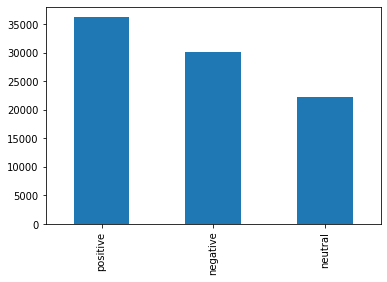

In [0]:
rdf.review.value_counts().plot.bar()



---


**2. Year**

In [0]:
rdf.year.value_counts()

2016    17368
2015    16110
2014    13164
2017    10899
2013     9706
2012     7806
2011     6247
2010     3639
2009     1676
2008     1103
2007      448
2006      260
2005       90
Name: year, dtype: int64

In [0]:
rdf.year.mean()

2014.0441050205613

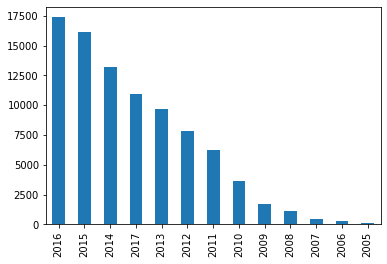

In [0]:
rdf.year.value_counts().plot.bar()

In [0]:
rdf.year.quantile(.25)

2013.0



---
**3. Month**


In [0]:
rdf.month.value_counts()

7     9235
6     8300
5     7968
8     7897
4     7524
3     7328
1     7178
2     7013
10    6608
9     6597
12    6510
11    6358
Name: month, dtype: int64

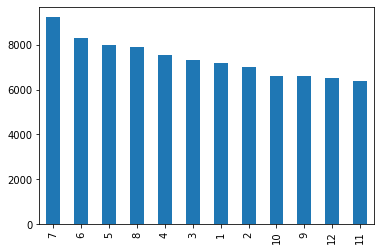

In [0]:
rdf.month.value_counts().plot.bar()



---


**4. Weekday**

In [0]:
rdf.weekday.value_counts()

Sunday       14269
Monday       13729
Saturday     12530
Wednesday    12486
Tuesday      12152
Thursday     11891
Friday       11459
Name: weekday, dtype: int64

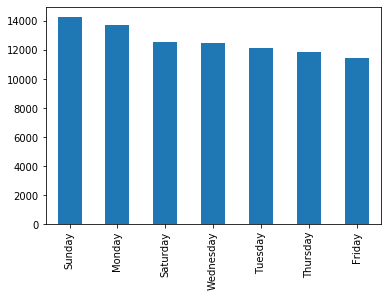

In [0]:
rdf.weekday.value_counts().plot.bar()



---
**5. Category**


In [0]:
rdf.category.value_counts()

restaurants       56323
bars              12779
other              6917
entertainment      6729
travel             2722
beauty_spa         1876
public_service     1170
Name: category, dtype: int64

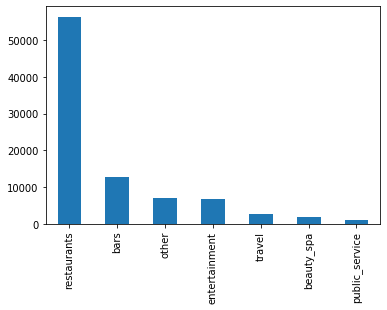

In [0]:
rdf.category.value_counts().plot.bar()



---

**6. Open**

In [0]:
rdf.open.value_counts()

1    79325
0     9191
Name: open, dtype: int64

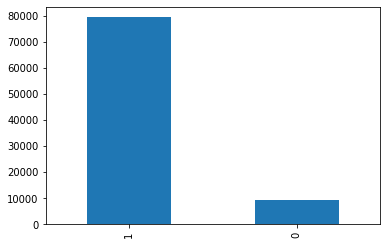

In [0]:
rdf.open.value_counts().plot.bar()



---
**7. District**



In [0]:
rdf.district.value_counts()

other                 37390
Gateway District      12570
Ohio City             10647
Tremont                8069
Detroit-Shoreway       3965
Goodrich Kirtland      3388
Warehouse District     3258
University             2884
Little Italy           2268
Riverside              2056
Civic Center           2021
Name: district, dtype: int64

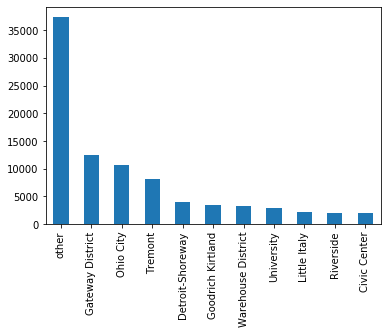

In [0]:
rdf.district.value_counts().plot.bar()

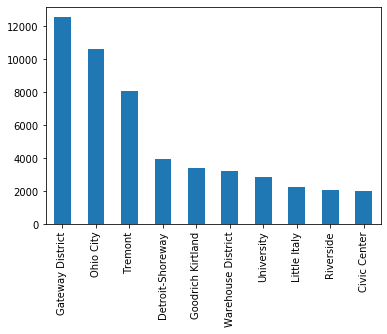

In [0]:
#without Other districts
rdf.district.value_counts()[1:].plot.bar()



---
**8. Street**


In [0]:
rdf.street.value_counts()

other            47956
Euclid Ave        6739
W 25th St         4474
E 4th St          3674
Lorain Ave        3633
Mayfield Rd       3269
Detroit Ave       3180
Lee Rd            2481
Coventry Rd       2422
Professor Ave     1661
Cedar Rd          1642
W 11th St         1280
Pearl Rd          1260
Riverside Dr      1256
Market Ave        1207
W 6th St          1196
Fulton Rd         1186
Name: street, dtype: int64

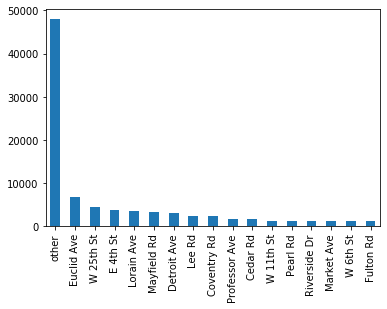

In [0]:
rdf.street.value_counts().plot.bar()

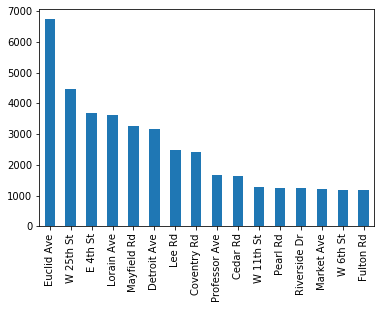

In [0]:
#without Other streets
rdf.street.value_counts()[1:].plot.bar()



---
**9. Useful Review**


In [0]:
rdf.useful_review.value_counts()

not rated      45942
useful         21813
very useful    20761
Name: useful_review, dtype: int64

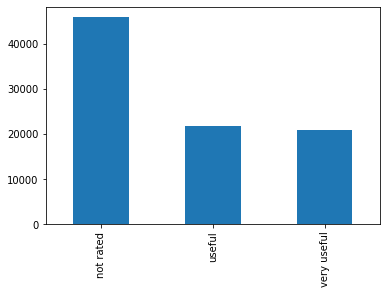

In [0]:
rdf.useful_review.value_counts().plot.bar()



---
**10. Cool Review**




In [0]:
rdf.cool_review.value_counts()

not rated    62928
cool         16241
very cool     9347
Name: cool_review, dtype: int64

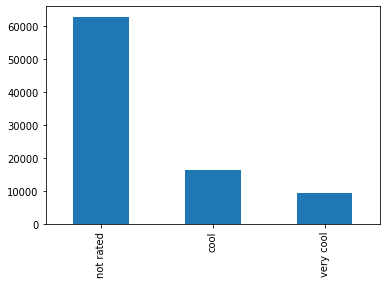

In [0]:
rdf.cool_review.value_counts().plot.bar()



---
**11. Funny Review**


In [0]:
rdf.funny_review.value_counts()

not rated     68622
funny         12809
very funny     7085
Name: funny_review, dtype: int64

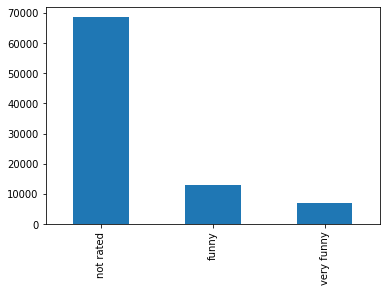

In [0]:
rdf.funny_review.value_counts().plot.bar()

### Numeric Data

In [0]:
rdf.describe()

,stars,year,month,company_star,company_review,reviewbin,open,post_code,accept_credit_card,mon_open,mon_close,tue_open,tue_close,wed_open,wed_close,thu_open,thu_close,fri_open,fri_close,sat_open,sat_close,sun_open,sun_close,park_garage,park_street,park_lot,park_valid,park_vallet,park_bike
count,88516.000000,88516.000000,88516.000000,88516.000000,88516.000000,88516.000000,88516.000000,88516.000000,88516.000000,88516.000000,88516.000000,88516.000000,88516.000000,88516.000000,88516.000000,88516.000000,88516.000000,88516.000000,88516.000000,88516.000000,88516.000000,88516.000000,88516.000000,88516.000000,88516.000000,88516.000000,88516.000000,88516.000000,88516.000000
mean,3.763150,2014.044105,6.374622,3.757688,157.698653,1.987776,0.896166,44051.733201,0.846310,8.047890,11.484907,9.459623,13.458324,9.651690,13.687119,9.613889,13.351394,9.551753,11.847858,9.456516,11.264461,7.371436,10.822439,-0.044636,0.377649,0.133580,-0.122260,-0.010642,0.539891
std,1.342636,2.295387,3.331614,0.684559,186.425957,1.610277,0.305047,1669.843033,0.510713,5.932172,10.258941,5.439669,9.806517,5.328771,9.725802,5.289526,9.793024,5.151611,10.106608,5.366045,10.115130,6.149075,10.179722,0.469467,0.708563,0.618681,0.360304,0.506234,0.779635
min,1.000000,2005.000000,1.000000,1.000000,3.000000,1.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,3.000000,2013.000000,4.000000,3.500000,31.000000,1.000000,1.000000,44113.000000,1.000000,0.000000,0.000000,7.000000,1.000000,7.000000,2.000000,7.000000,2.000000,7.000000,1.000000,8.000000,1.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,2015.000000,6.000000,4.000000,89.000000,1.000000,1.000000,44113.000000,1.000000,10.000000,17.000000,11.000000,19.000000,11.000000,19.000000,11.000000,19.000000,11.000000,17.000000,11.000000,15.000000,10.000000,15.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
75%,5.000000,2016.000000,9.000000,4.000000,205.000000,2.000000,1.000000,44115.000000,1.000000,11.000000,22.000000,11.000000,22.000000,11.000000,22.000000,11.000000,22.000000,11.000000,22.000000,12.000000,22.000000,11.000000,21.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,5.000000,2017.000000,12.000000,5.000000,896.000000,8.000000,1.000000,44199.000000,1.000000,22.000000,23.000000,22.000000,23.000000,22.000000,23.000000,22.000000,23.000000,22.000000,23.000000,23.000000,23.000000,22.000000,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000




---


**1. Stars**

In [0]:
rdf.stars.value_counts()

5    35073
4    24507
3    11441
1     9607
2     7888
Name: stars, dtype: int64

In [0]:
rdf.stars.mean()

3.763150164941931

In [0]:
rdf.stars.quantile(0.5)

4.0

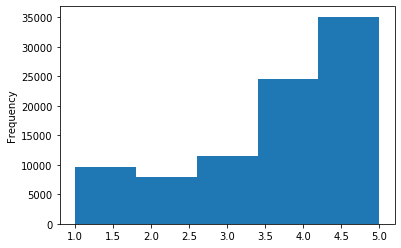

In [0]:
rdf.stars.plot.hist(bins=5)#value_counts().plot.bar()

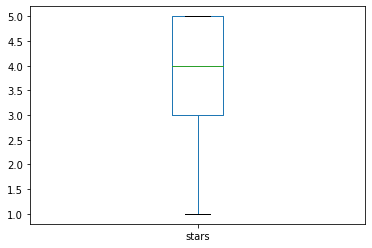

In [0]:
rdf.stars.plot.box()

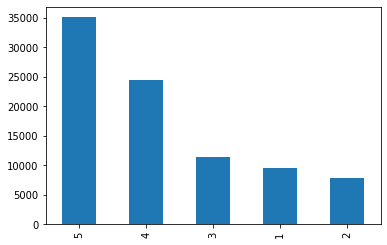

In [0]:
rdf.stars.value_counts().plot.bar()



---


**2. Company Review**

In [0]:
rdf.company_review.value_counts()

3      1558
4      1334
5      1251
6      1145
35     1004
       ... 
113     112
112     112
52      102
92       89
68       68
Name: company_review, Length: 224, dtype: int64

In [0]:
rdf.company_review.mean()

157.69865335080664

In [0]:
rdf.company_review.describe()

count    88516.000000
mean       157.698653
std        186.425957
min          3.000000
25%         31.000000
50%         89.000000
75%        205.000000
max        896.000000
Name: company_review, dtype: float64

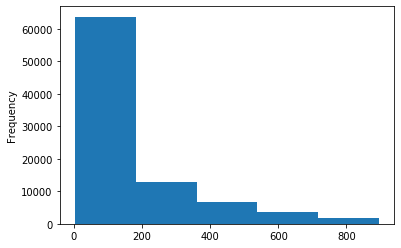

In [0]:
rdf.company_review.plot.hist(bins=5)

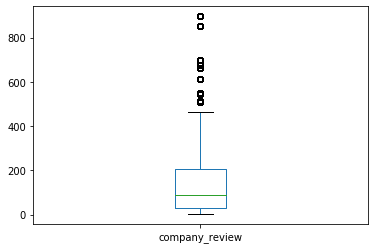

In [0]:
rdf.company_review.plot.box()



---
**3. Company Stars**


In [0]:
rdf.company_star.value_counts()

4.0    33907
3.5    17977
4.5    15627
3.0    10718
2.5     4222
5.0     3213
2.0     1681
1.5      879
1.0      292
Name: company_star, dtype: int64

In [0]:
rdf.company_star.mean()

3.7576878756383025

In [0]:
rdf.company_star.describe()

count    88516.000000
mean         3.757688
std          0.684559
min          1.000000
25%          3.500000
50%          4.000000
75%          4.000000
max          5.000000
Name: company_star, dtype: float64

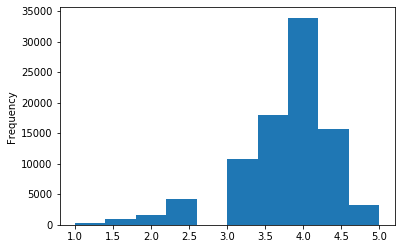

In [0]:
rdf.company_star.plot.hist()

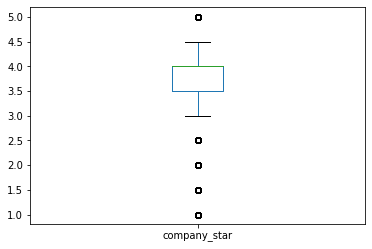

In [0]:
rdf.company_star.plot.box()



---
**4. Hours**


In [0]:
rdf.mon_open.value_counts()

 11    26853
-1     20013
 16     7583
 7      6099
 10     6058
 17     5326
 6      4314
 9      3472
 0      2547
 8      2395
 12     1576
 5       774
 15      769
 14      190
 18      155
 13      152
 19      136
 4        56
 22       24
 20       21
 21        3
Name: mon_open, dtype: int64

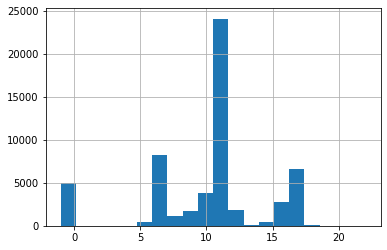

In [0]:
#mon-fri
rest_df.fri_open.hist(bins=20)

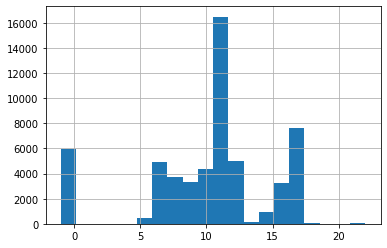

In [0]:
#sat
rest_df.sat_open.hist(bins=20)

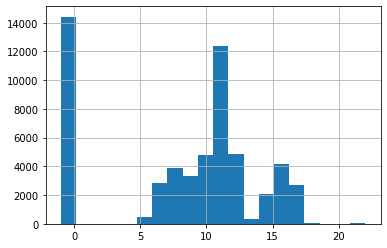

In [0]:
#sun
rest_df.sun_open.hist(bins=20)

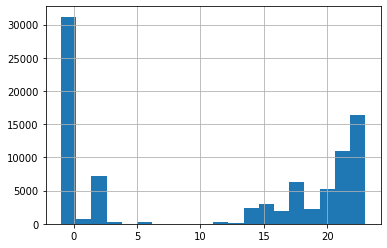

In [0]:
#mon-fri
rdf.sun_close.hist(bins=20)

## Relationship

### Correlation

In [0]:
rdf.corr()

,stars,year,month,company_star,company_review,reviewbin,open,post_code,accept_credit_card,mon_open,mon_close,tue_open,tue_close,wed_open,wed_close,thu_open,thu_close,fri_open,fri_close,sat_open,sat_close,sun_open,sun_close,park_garage,park_street,park_lot,park_valid,park_vallet,park_bike
stars,1.000000,0.005912,-0.013017,0.487859,0.067757,0.059574,0.031339,0.003056,0.029935,0.036224,0.038466,0.100982,0.088804,0.107424,0.100317,0.104131,0.098354,0.111569,0.112537,0.090792,0.100867,0.023139,0.034697,0.012317,0.093642,0.057905,0.052868,0.017983,0.091413
year,0.005912,1.000000,-0.157762,0.055315,-0.033593,-0.034041,0.212306,0.003314,0.037431,0.033119,0.051944,0.020181,0.051639,0.012899,0.044584,0.015530,0.041930,0.008071,0.006110,0.006807,0.002938,0.009458,0.028957,0.030249,-0.039818,-0.028285,-0.012468,0.036640,0.088119
month,-0.013017,-0.157762,1.000000,-0.015589,0.014303,0.015616,-0.012493,-0.004696,-0.009214,-0.011889,-0.009766,-0.013463,-0.013294,-0.012282,-0.011218,-0.012228,-0.010850,-0.011071,-0.006954,-0.010733,-0.005896,-0.014376,-0.009614,-0.004759,-0.011394,-0.009852,-0.011791,-0.009077,-0.005288
company_star,0.487859,0.055315,-0.015589,1.000000,0.114896,0.099852,0.067188,0.005046,0.055616,0.072017,0.071857,0.196151,0.168472,0.205151,0.186994,0.197654,0.179656,0.208594,0.199085,0.168840,0.178497,0.042792,0.063704,0.018601,0.181661,0.107917,0.095877,0.023741,0.175004
company_review,0.067757,-0.033593,0.014303,0.114896,1.000000,0.983844,0.167577,0.028427,0.130683,0.227271,0.064598,0.296120,0.105293,0.289255,0.105945,0.277329,0.070398,0.265513,0.060255,0.303496,0.092661,0.251314,0.180849,0.117597,0.208905,0.100169,0.159646,0.195369,0.293186
reviewbin,0.059574,-0.034041,0.015616,0.099852,0.983844,1.000000,0.159906,0.022653,0.105046,0.202005,0.041908,0.255318,0.072499,0.247037,0.071939,0.236865,0.035161,0.224967,0.033963,0.258274,0.063225,0.208333,0.139925,0.093099,0.170422,0.082947,0.126914,0.174519,0.249767
open,0.031339,0.212306,-0.012493,0.067188,0.167577,0.159906,1.000000,-0.012873,-0.019258,0.114525,0.070207,0.027754,0.008284,0.034039,0.030663,0.013375,0.001296,0.023905,0.045061,0.008523,0.037136,0.047556,0.025012,-0.029997,-0.048402,-0.015460,-0.046841,-0.012057,0.177859
post_code,0.003056,0.003314,-0.004696,0.005046,0.028427,0.022653,-0.012873,1.000000,0.043478,0.042881,0.032112,0.056170,0.040898,0.047436,0.031037,0.047526,0.029579,0.048413,0.032579,0.041579,0.029491,0.039206,0.034678,0.018004,0.025217,0.027063,0.019480,0.021993,0.049502
accept_credit_card,0.029935,0.037431,-0.009214,0.055616,0.130683,0.105046,-0.019258,0.043478,1.000000,0.237088,0.141477,0.286582,0.162103,0.293741,0.157131,0.299725,0.155697,0.294844,0.102015,0.292660,0.114811,0.221791,0.177505,0.427505,0.461630,0.408547,0.539101,0.450048,0.448691
mon_open,0.036224,0.033119,-0.011889,0.072017,0.227271,0.202005,0.114525,0.042881,0.237088,1.000000,0.552364,0.634061,0.232618,0.648430,0.232800,0.622907,0.207287,0.600142,0.153092,0.557858,0.145168,0.397985,0.213765,0.212750,0.301989,0.130055,0.275861,0.304105,0.323029


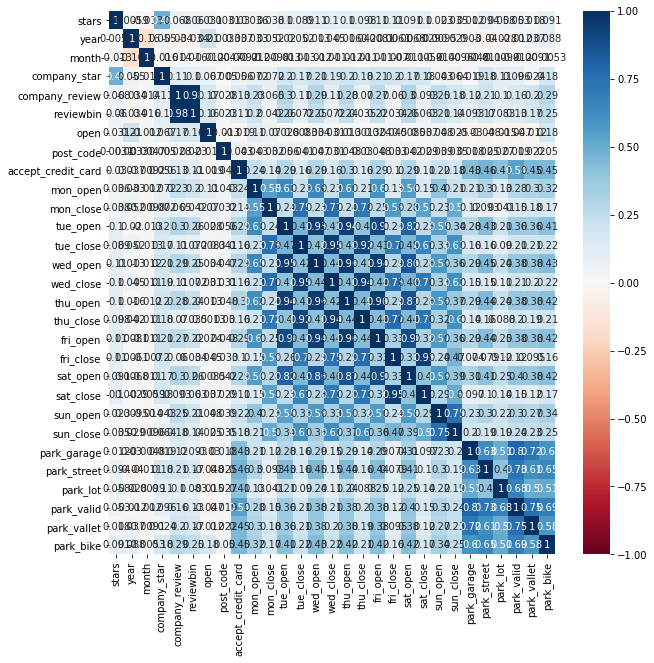

In [0]:
ax, fig = plt.subplots(figsize=(10,10))
sns.heatmap(rdf.corr(), annot = True, cmap = 'RdBu', vmin = -1, vmax = 1)



---
**Hours correlation**


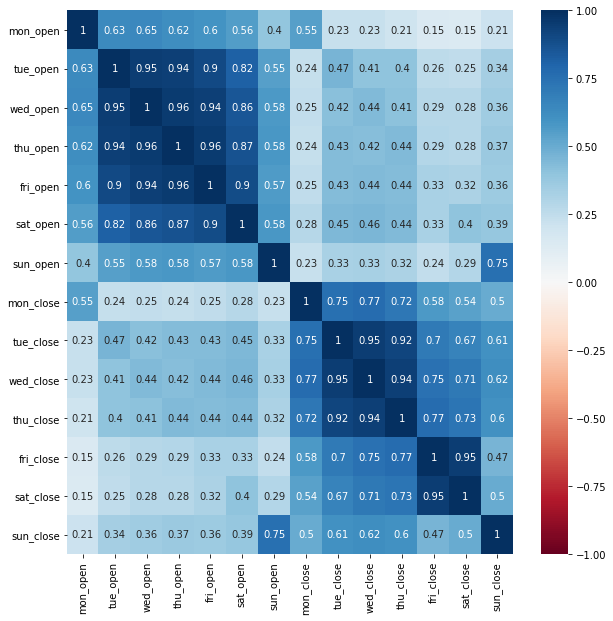

In [0]:
wdf = rdf[['mon_open', 'tue_open', 'wed_open',  'thu_open', 'fri_open', 'sat_open', 'sun_open',
           'mon_close', 'tue_close', 'wed_close', 'thu_close', 'fri_close', 'sat_close', 'sun_close']]
ax, fig = plt.subplots(figsize=(10,10))
sns.heatmap(wdf.corr(), vmax = 1, vmin=-1, annot=True, cmap='RdBu')



---
**Parking correlation**


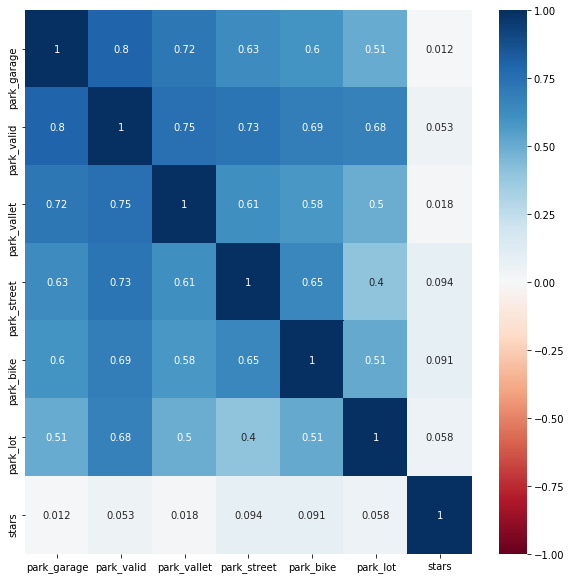

In [0]:
pdf = rdf[['park_garage', 'park_valid', 'park_vallet', 'park_street', 'park_bike', 'park_lot', 'stars']]
ax, fig = plt.subplots(figsize=(10,10))
sns.heatmap(pdf.corr(), vmax = 1, vmin=-1, annot=True, cmap='RdBu')

### Year vs Star

In [0]:
rdf.pipe(lambda df_: pd.crosstab(df_.year, df_.stars))

stars,1,2,3,4,5
year,,,,,
2005,0,2,13,52,23
2006,16,17,58,88,81
2007,20,39,57,142,190
2008,44,104,215,384,356
2009,93,142,318,631,492
2010,220,344,658,1299,1118
2011,421,612,1004,2170,2040
2012,673,780,1209,2573,2571
2013,944,928,1417,2929,3488


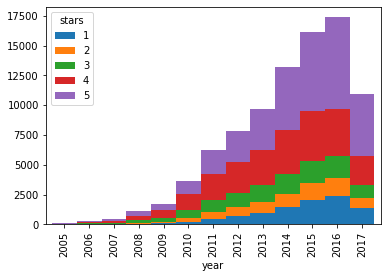

In [0]:
rdf.pipe(lambda df_: pd.crosstab(df_.year, df_.stars)).plot.bar(stacked=True, width=1)

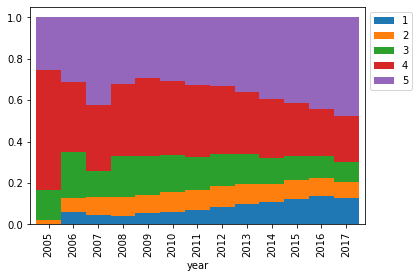

In [0]:
(rdf
 .pipe(lambda df_: pd.crosstab(df_.year, df_.stars))
 .pipe(lambda df_: df_.div(df_.sum(axis=1), axis=0))
 .plot.bar(stacked=True, width=1)
 .legend(bbox_to_anchor = (1,1)))

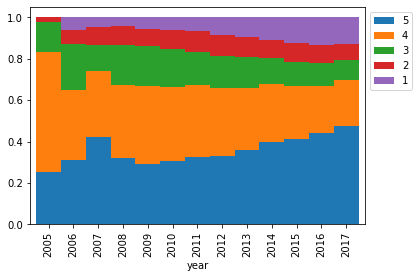

In [0]:
stars = [5,4,3,2,1]
(rdf
 .pipe(lambda df_: pd.crosstab(df_.year, df_.stars))
 .pipe(lambda df_: df_.div(df_.sum(axis=1), axis=0))
 .loc[:,stars]
 .plot.bar(stacked=True, width=1)
 .legend(bbox_to_anchor = (1,1)))

In [0]:
rdf.year.corr(rdf.stars)

0.005911698845209549

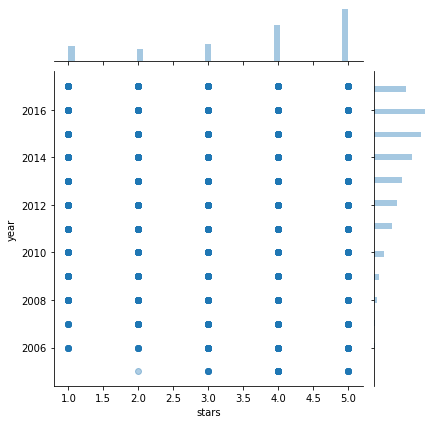

In [0]:
sns.jointplot(x='stars', y='year', alpha = .2, data = rdf)

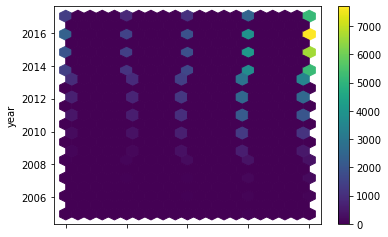

In [0]:
rdf.plot.hexbin(x='stars', y='year', gridsize = 20, cmap = 'viridis')

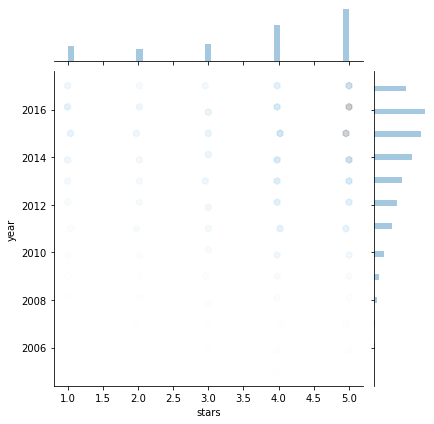

In [0]:
sns.jointplot(x='stars', y='year', alpha = .2, data = rdf, kind='hex')

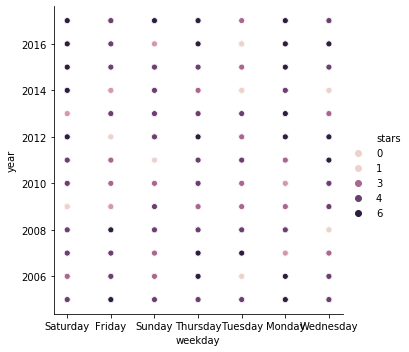

In [0]:
sns.relplot(x='weekday', y = 'year', data = rdf, hue= 'stars')

### Month vs Star

In [0]:
rdf.pipe(lambda df_: pd.crosstab(df_.month, df_.stars))

stars,1,2,3,4,5
month,,,,,
1,717,596,937,2053,2875
2,754,603,856,2002,2798
3,716,628,926,2053,3005
4,780,650,981,2054,3059
5,891,716,980,2140,3241
6,954,769,1062,2264,3251
7,1100,848,1171,2446,3670
8,894,714,1051,2262,2976
9,720,654,884,1805,2534


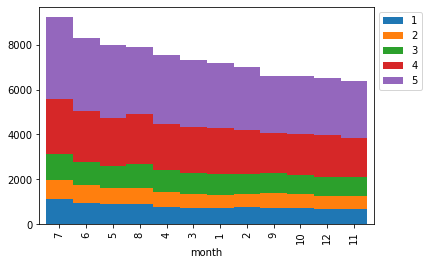

In [0]:
month = [7,6,5,8,4,3,1,2,9,10,12,11]
(rdf
 .pipe(lambda df_: pd.crosstab(df_.month, df_.stars))
 .loc[month]
 .plot.bar(stacked=True, width=1)
 .legend(bbox_to_anchor=(1,1))
 )

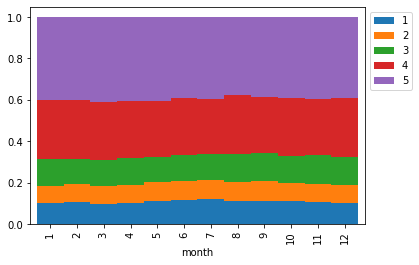

In [0]:
(rdf
 .pipe(lambda df_: pd.crosstab(df_.month, df_.stars))
 .pipe(lambda df_: df_.div(df_.sum(axis=1), axis=0))
 .plot.bar(stacked=True, width=1)
 .legend(bbox_to_anchor=(1,1))
 )

### Weekday vs Star

In [0]:
(rdf.pipe(lambda df_: pd.crosstab(df_.weekday, df_.stars)))

stars,1,2,3,4,5
weekday,,,,,
Friday,1222,967,1433,3163,4674
Monday,1438,1257,1835,3971,5228
Saturday,1441,1126,1576,3327,5060
Sunday,1732,1407,1869,3792,5469
Thursday,1261,993,1450,3327,4860
Tuesday,1199,1058,1665,3434,4796
Wednesday,1314,1080,1613,3493,4986


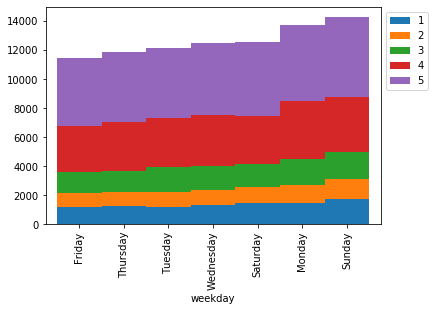

In [0]:
weekday = ['Friday', 'Thursday', 'Tuesday', 'Wednesday', 'Saturday', 'Monday', 'Sunday']
(rdf
 .pipe(lambda df_: pd.crosstab(df_.weekday, df_.stars))
 .loc[weekday]
 .plot.bar(stacked=True, width =1)
 .legend(bbox_to_anchor=(1,1)))

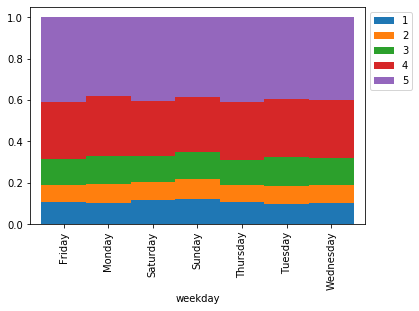

In [0]:
(rdf
 .pipe(lambda df_: pd.crosstab(df_.weekday, df_.stars))
 .pipe(lambda df_: df_.div(df_.sum(axis=1), axis=0))
 .plot.bar(stacked=True, width =1)
 .legend(bbox_to_anchor=(1,1)))

### Category vs Stars

In [0]:
(rdf.pipe(lambda df_: pd.crosstab(df_.category, df_.stars)))

stars,1,2,3,4,5
category,,,,,
bars,1517,1360,1964,3758,4180
beauty_spa,234,90,111,309,1132
entertainment,688,533,903,1857,2748
other,1198,422,508,1191,3598
public_service,191,37,55,164,723
restaurants,5112,5100,7434,16573,22104
travel,667,346,466,655,588


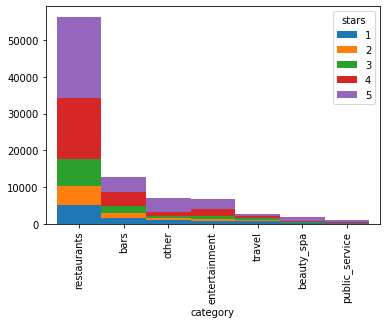

In [0]:
category = ['restaurants','bars','other','entertainment', 'travel', 'beauty_spa','public_service']
(rdf
 .pipe(lambda df_: pd.crosstab(df_.category, df_.stars))
 .loc[category]
 .plot.bar(stacked=True, width =1)
 #.legend(bbox_to_anchor=(1,1))
 )

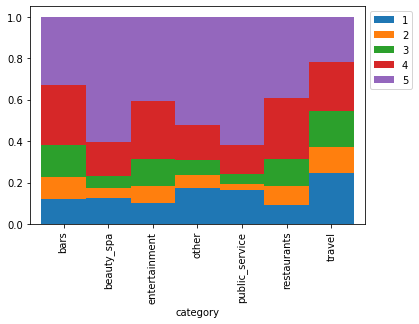

In [0]:
(rdf
 .pipe(lambda df_: pd.crosstab(df_.category, df_.stars))
 .pipe(lambda df_: df_.div(df_.sum(axis=1), axis=0))
 .plot.bar(stacked=True, width =1)
 .legend(bbox_to_anchor=(1,1)))

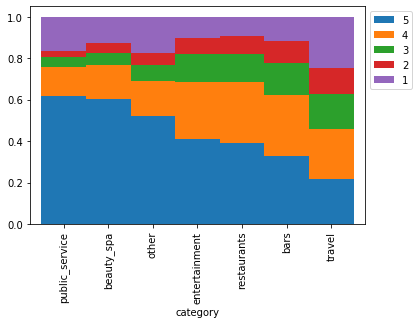

In [0]:
category = ['public_service', 'beauty_spa', 'other', 'entertainment', 'restaurants', 'bars', 'travel']
stars = [5,4,3,2,1]
(rdf
 .pipe(lambda df_: pd.crosstab(df_.category, df_.stars))
 .pipe(lambda df_: df_.div(df_.sum(axis=1), axis=0))
 .loc[category, stars]
 .plot.bar(stacked=True, width =1)
 .legend(bbox_to_anchor=(1,1)))

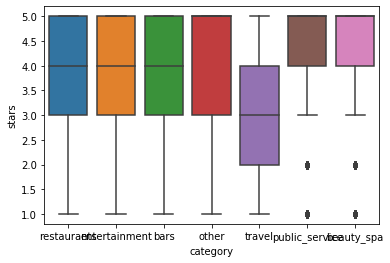

In [0]:
sns.boxplot(x='category', y='stars', data = rdf)

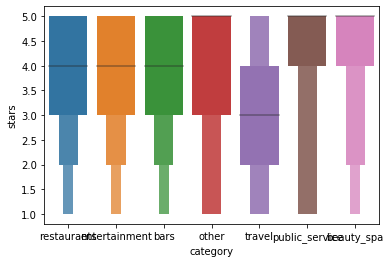

In [0]:
sns.boxenplot(x='category', y='stars', data = rdf)

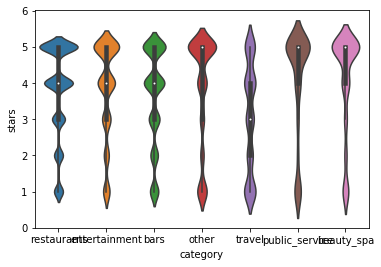

In [0]:
sns.violinplot(x='category', y='stars', data = rdf)

### Credit Card Accept vs Star

In [0]:
(rdf.pipe(lambda df_: pd.crosstab(df_.accept_credit_card, df_.stars)))

stars,1,2,3,4,5
accept_credit_card,,,,,
-1,1168,459,634,1209,2317
0,144,77,147,490,1172
1,8295,7352,10660,22808,31584


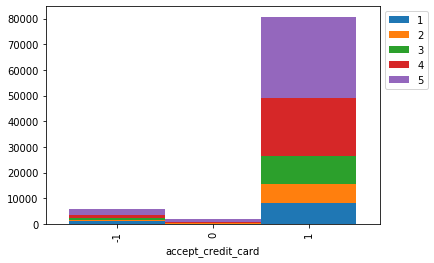

In [0]:
(rdf
 .pipe(lambda df_: pd.crosstab(df_.accept_credit_card, df_.stars))
 .plot.bar(stacked=True, width =1)
 .legend(bbox_to_anchor=(1,1)))

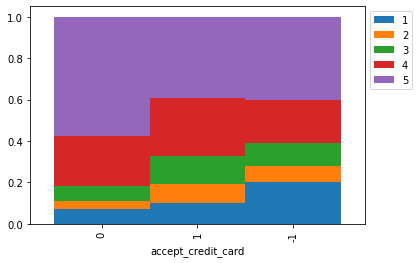

In [0]:
accept = [0, 1, -1]
(rdf
 .pipe(lambda df_: pd.crosstab(df_.accept_credit_card, df_.stars))
 .pipe(lambda df_: df_.div(df_.sum(axis=1), axis=0))
 .loc[accept]
 .plot.bar(stacked=True, width =1)
 .legend(bbox_to_anchor=(1,1)))

###  Company Star vs Open

In [0]:
(rdf.pipe(lambda df_: pd.crosstab(df_.company_star, df_.open)))

open,0,1
company_star,,
1.0,36,256
1.5,52,827
2.0,300,1381
2.5,825,3397
3.0,908,9810
3.5,2381,15596
4.0,3461,30446
4.5,1046,14581
5.0,182,3031


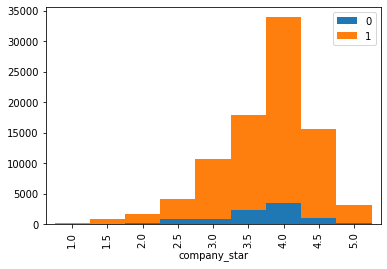

In [0]:
(rdf
 .pipe(lambda df_: pd.crosstab(df_.company_star, df_.open))
 .plot.bar(stacked=True, width =1)
 .legend(bbox_to_anchor=(1,1)))

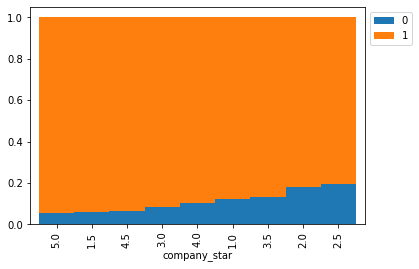

In [0]:
stars = [5.0, 1.5, 4.5, 3.0, 4.0, 1.0, 3.5, 2.0, 2.5]
(rdf
 .pipe(lambda df_: pd.crosstab(df_.company_star, df_.open))
 .pipe(lambda df_: df_.div(df_.sum(axis=1), axis=0))
 .loc[stars]
 .plot.bar(stacked=True, width =1)
 .legend(bbox_to_anchor=(1,1)))

### Company Review vs Open

In [0]:
(rdf.pipe(lambda df_: pd.crosstab(df_.reviewbin, df_.is_open)))

is_open,0,1
reviewbin,,
151-300,391,14146
2-150,8428,50920
301-450,372,5563
451-600,0,4349
600-750,0,2618
750-900,0,1729


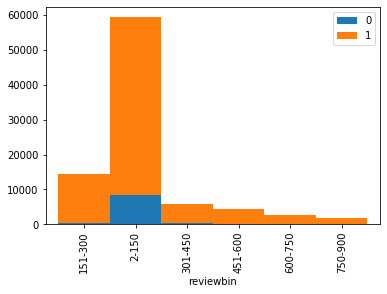

In [0]:
(rdf
 .pipe(lambda df_: pd.crosstab(df_.reviewbin, df_.is_open))
 .plot.bar(stacked=True, width =1)
 .legend(bbox_to_anchor=(1,1)))

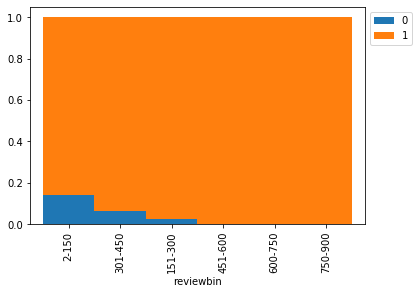

In [0]:
reviewbin = ['2-150', '301-450', '151-300', '451-600', '600-750', '750-900']
(rdf
 .pipe(lambda df_: pd.crosstab(df_.reviewbin, df_.is_open))
 .pipe(lambda df_: df_.div(df_.sum(axis=1), axis=0))
 .loc[reviewbin]
 .plot.bar(stacked=True, width =1)
 .legend(bbox_to_anchor=(1,1)))

### Restaurants, Monday Open/Close vs Stars



---


**1. Open**


---



In [0]:
(rest_df
 .pipe(lambda df_: pd.crosstab(df_.mon_open, df_.stars))
 .assign(sum = lambda df_: df_.sum(axis=1))
 .sort_values(by=['sum'], ascending = False)
 #.loc[:,[1,2,3,4,5]]
 .head()
 )

stars,1,2,3,4,5,sum
mon_open,,,,,,
11,1807,2029,2824,5868,7286,19814
-1,1259,1018,1541,3342,4870,12030
7,323,348,569,1525,2106,4871
16,327,408,594,1324,1591,4244
17,285,331,538,1266,1685,4105


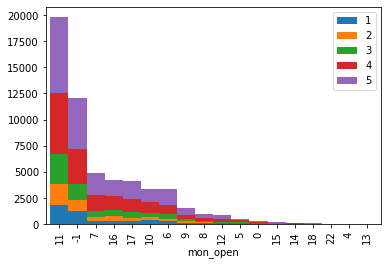

In [0]:
(rest_df
 .pipe(lambda df_: pd.crosstab(df_.mon_open, df_.stars))
 .assign(sum = lambda df_: df_.sum(axis=1))
 .sort_values(by=['sum'], ascending = False)
 .loc[:,[1,2,3,4,5]]
 .plot.bar(stacked=True, width =1)
 .legend(bbox_to_anchor=(1,1)))

In [0]:
(rest_df
 .pipe(lambda df_: pd.crosstab(df_.mon_open, df_.stars))
 .pipe(lambda df_: df_.div(df_.sum(axis=1), axis=0))
 .assign(reviewbin = lambda df_: pd.cut(rest_df.pipe(lambda df_: pd.crosstab(df_.mon_open, df_.stars)).sum(axis=1), bins=50, labels=[x for x in range(1, 51)]))
 .sort_values(by=['reviewbin', 5], ascending = False)
 .loc[:,[1,2,3,4,5]]
 .head()
)

stars,1,2,3,4,5
mon_open,,,,,
11,0.091198,0.102402,0.142525,0.296154,0.367720
-1,0.104655,0.084622,0.128096,0.277805,0.404821
7,0.066311,0.071443,0.116814,0.313077,0.432355
17,0.069428,0.080633,0.131060,0.308404,0.410475
16,0.077050,0.096136,0.139962,0.311970,0.374882


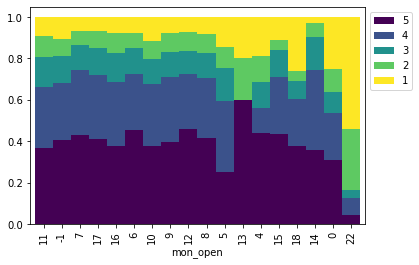

In [0]:
stars=[5,4,3,2,1]
(rest_df
 .pipe(lambda df_: pd.crosstab(df_.mon_open, df_.stars))
 .pipe(lambda df_: df_.div(df_.sum(axis=1), axis=0))
 .assign(reviewbin = lambda df_: pd.cut(rest_df.pipe(lambda df_: pd.crosstab(df_.mon_open, df_.stars)).sum(axis=1), bins=50, labels=[x for x in range(1, 51)]))
 .sort_values(by=['reviewbin', 5], ascending = False)
 .loc[:,[1,2,3,4,5]]
 .loc[:,stars]
 .plot.bar(stacked=True, width =1, cmap='viridis')
 .legend(bbox_to_anchor=(1,1))
 )



---


**2. Close**

---



In [0]:
(rest_df
 .pipe(lambda df_: pd.crosstab(df_.mon_close, df_.stars))
 .assign(sum = lambda df_: df_.sum(axis=1))
 .sort_values(by=['sum'], ascending = False)
 #.loc[:,[1,2,3,4,5]]
 .head()
 )

stars,1,2,3,4,5,sum
mon_close,,,,,,
22,1252,1430,1994,4537,5865,15078
-1,1259,1018,1541,3342,4870,12030
21,606,697,933,1930,2410,6576
23,432,463,629,1239,1550,4313
2,360,345,501,1102,1139,3447


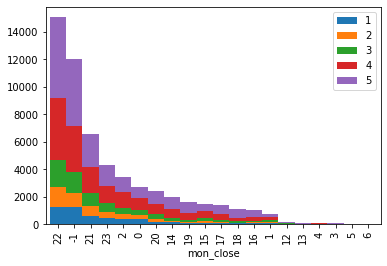

In [0]:
(rest_df
 .pipe(lambda df_: pd.crosstab(df_.mon_close, df_.stars))
 .assign(sum = lambda df_: df_.sum(axis=1))
 .sort_values(by=['sum'], ascending = False)
 .loc[:,[1,2,3,4,5]]
 .plot.bar(stacked=True, width =1)
 .legend(bbox_to_anchor=(1,1)))

In [0]:
(rest_df
 .pipe(lambda df_: pd.crosstab(df_.mon_close, df_.stars))
 .pipe(lambda df_: df_.div(df_.sum(axis=1), axis=0))
 .assign(reviewbin = lambda df_: pd.cut(rest_df.pipe(lambda df_: pd.crosstab(df_.mon_close, df_.stars)).sum(axis=1), bins=50, labels=[x for x in range(1, 51)]))
 .sort_values(by=['reviewbin', 5], ascending = False)
 .loc[:,[1,2,3,4,5]]
 .head()
)

stars,1,2,3,4,5
mon_close,,,,,
22,0.083035,0.094840,0.132246,0.300902,0.388977
-1,0.104655,0.084622,0.128096,0.277805,0.404821
21,0.092153,0.105991,0.141880,0.293491,0.366484
23,0.100162,0.107350,0.145838,0.287271,0.359379
2,0.104439,0.100087,0.145344,0.319698,0.330432


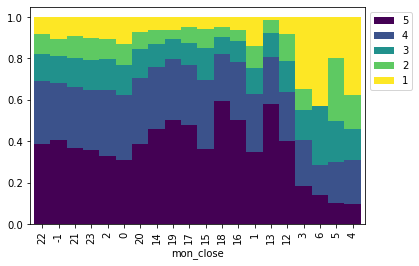

In [0]:
stars=[5,4,3,2,1]
(rest_df
 .pipe(lambda df_: pd.crosstab(df_.mon_close, df_.stars))
 .pipe(lambda df_: df_.div(df_.sum(axis=1), axis=0))
 .assign(reviewbin = lambda df_: pd.cut(rest_df.pipe(lambda df_: pd.crosstab(df_.mon_close, df_.stars)).sum(axis=1), bins=50, labels=[x for x in range(1, 51)]))
 .sort_values(by=['reviewbin', 5], ascending = False)
 .loc[:,[1,2,3,4,5]]
 .loc[:, stars]
 .plot.bar(stacked=True, width =1, cmap = 'viridis')
 .legend(bbox_to_anchor=(1,1))
 )

### Restaurants, Tuesday Open/Close vs Stars






---


**1. Open**


---



In [0]:
(rest_df
 .pipe(lambda df_: pd.crosstab(df_.tue_open, df_.stars))
 .assign(sum = lambda df_: df_.sum(axis=1))
 .sort_values(by=['sum'], ascending = False)
 #.loc[:,[1,2,3,4,5]]
 .head()
 )

stars,1,2,3,4,5,sum
tue_open,,,,,,
11,1981,2194,3066,6335,8039,21615
17,408,521,811,2031,2740,6511
-1,907,597,864,1589,1970,5927
16,358,444,662,1603,2085,5152
7,312,344,573,1502,2061,4792


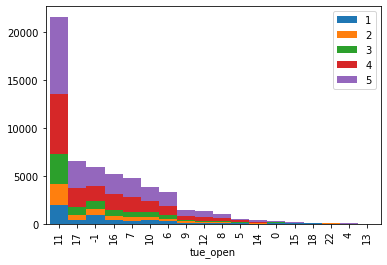

In [0]:
(rest_df
 .pipe(lambda df_: pd.crosstab(df_.tue_open, df_.stars))
 .assign(sum = lambda df_: df_.sum(axis=1))
 .sort_values(by=['sum'], ascending = False)
 .loc[:,[1,2,3,4,5]]
 .plot.bar(stacked=True, width =1)
 .legend(bbox_to_anchor=(1,1)))

In [0]:
(rest_df
 .pipe(lambda df_: pd.crosstab(df_.tue_open, df_.stars))
 .pipe(lambda df_: df_.div(df_.sum(axis=1), axis=0))
 .assign(reviewbin = lambda df_: pd.cut(rest_df.pipe(lambda df_: pd.crosstab(df_.tue_open, df_.stars)).sum(axis=1), bins=50, labels=[x for x in range(1, 51)]))
 .sort_values(by=['reviewbin', 5], ascending = False)
 #.loc[:,[1,2,3,4,5]]
 .head()
)

stars,1,2,3,4,5,reviewbin
tue_open,,,,,,
11,0.091649,0.101504,0.141846,0.293084,0.371918,50
17,0.062663,0.080018,0.124558,0.311934,0.420826,16
-1,0.153029,0.100725,0.145774,0.268095,0.332377,14
7,0.065109,0.071786,0.119574,0.313439,0.430092,12
16,0.069488,0.086180,0.128494,0.311141,0.404697,12


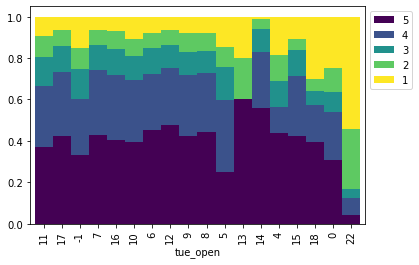

In [0]:
stars=[5,4,3,2,1]
(rest_df
 .pipe(lambda df_: pd.crosstab(df_.tue_open, df_.stars))
 .pipe(lambda df_: df_.div(df_.sum(axis=1), axis=0))
 .assign(reviewbin = lambda df_: pd.cut(rest_df.pipe(lambda df_: pd.crosstab(df_.tue_open, df_.stars)).sum(axis=1), bins=50, labels=[x for x in range(1, 51)]))
 .sort_values(by=['reviewbin', 5], ascending = False)
 .loc[:,[1,2,3,4,5]]
 .loc[:, stars]
 .plot.bar(stacked=True, width =1, cmap = 'viridis')
 .legend(bbox_to_anchor=(1,1))
 )



---

**2. Close**

---



In [0]:
(rest_df
 .pipe(lambda df_: pd.crosstab(df_.tue_close, df_.stars))
 .assign(sum = lambda df_: df_.sum(axis=1))
 .sort_values(by=['sum'], ascending = False)
 #.loc[:,[1,2,3,4,5]]
 .head()
 )

stars,1,2,3,4,5,sum
tue_close,,,,,,
22,1479,1704,2423,5609,7538,18753
21,674,765,1093,2418,3108,8058
-1,907,597,864,1589,1970,5927
23,450,482,642,1230,1543,4347
2,376,379,531,1203,1209,3698


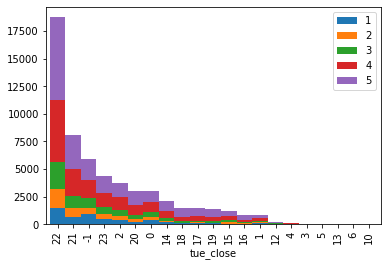

In [0]:
(rest_df
 .pipe(lambda df_: pd.crosstab(df_.tue_close, df_.stars))
 .assign(sum = lambda df_: df_.sum(axis=1))
 .sort_values(by=['sum'], ascending = False)
 .loc[:,[1,2,3,4,5]]
 .plot.bar(stacked=True, width =1)
 .legend(bbox_to_anchor=(1,1)))

In [0]:
(rest_df
 .pipe(lambda df_: pd.crosstab(df_.tue_close, df_.stars))
 .pipe(lambda df_: df_.div(df_.sum(axis=1), axis=0))
 .assign(reviewbin = lambda df_: pd.cut(rest_df.pipe(lambda df_: pd.crosstab(df_.tue_close, df_.stars)).sum(axis=1), bins=50, labels=[x for x in range(1, 51)]))
 .sort_values(by=['reviewbin', 5], ascending = False)
 .loc[:,[1,2,3,4,5]]
 .head()
)

stars,1,2,3,4,5
tue_close,,,,,
22,0.078867,0.090865,0.129206,0.299099,0.401962
21,0.083644,0.094937,0.135642,0.300074,0.385704
-1,0.153029,0.100725,0.145774,0.268095,0.332377
23,0.103520,0.110881,0.147688,0.282954,0.354957
2,0.101677,0.102488,0.143591,0.325311,0.326933


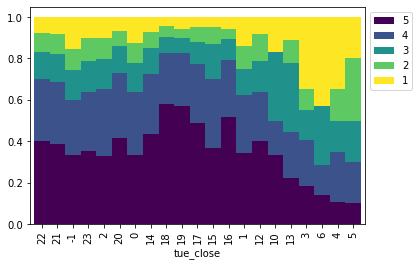

In [0]:
stars=[5,4,3,2,1]
(rest_df
 .pipe(lambda df_: pd.crosstab(df_.tue_close, df_.stars))
 .pipe(lambda df_: df_.div(df_.sum(axis=1), axis=0))
 .assign(reviewbin = lambda df_: pd.cut(rest_df.pipe(lambda df_: pd.crosstab(df_.tue_close, df_.stars)).sum(axis=1), bins=50, labels=[x for x in range(1, 51)]))
 .sort_values(by=['reviewbin', 5], ascending = False)
 .loc[:,[1,2,3,4,5]]
 .loc[:, stars]
 .plot.bar(stacked=True, width =1, cmap = 'viridis')
 .legend(bbox_to_anchor=(1,1))
 )

### Restaurants, Wednesday Open/Close vs Stars







---

**1. Open**

---



In [0]:
(rest_df
 .pipe(lambda df_: pd.crosstab(df_.wed_open, df_.stars))
 .assign(sum = lambda df_: df_.sum(axis=1))
 .sort_values(by=['sum'], ascending = False)
 #.loc[:,[1,2,3,4,5]]
 .head()
 )

stars,1,2,3,4,5,sum
wed_open,,,,,,
11,1971,2170,3055,6422,8191,21809
17,428,546,842,2098,2799,6713
16,378,465,688,1620,2097,5248
7,328,358,582,1555,2201,5024
-1,851,544,778,1280,1436,4889


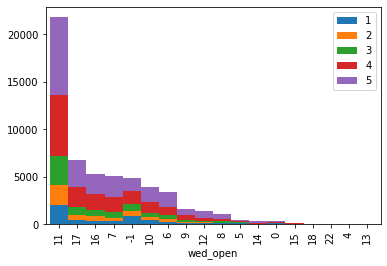

In [0]:
(rest_df
 .pipe(lambda df_: pd.crosstab(df_.wed_open, df_.stars))
 .assign(sum = lambda df_: df_.sum(axis=1))
 .sort_values(by=['sum'], ascending = False)
 .loc[:,[1,2,3,4,5]]
 .plot.bar(stacked=True, width =1)
 .legend(bbox_to_anchor=(1,1)))

In [0]:
(rest_df
 .pipe(lambda df_: pd.crosstab(df_.wed_open, df_.stars))
 .pipe(lambda df_: df_.div(df_.sum(axis=1), axis=0))
 .assign(reviewbin = lambda df_: pd.cut(rest_df.pipe(lambda df_: pd.crosstab(df_.wed_open, df_.stars)).sum(axis=1), bins=50, labels=[x for x in range(1, 51)]))
 .sort_values(by=['reviewbin', 5], ascending = False)
 #.loc[:,[1,2,3,4,5]]
 .head()
)

stars,1,2,3,4,5,reviewbin
wed_open,,,,,,
11,0.090376,0.099500,0.140080,0.294466,0.375579,50
17,0.063757,0.081335,0.125428,0.312528,0.416952,16
16,0.072027,0.088605,0.131098,0.308689,0.399581,13
7,0.065287,0.071258,0.115844,0.309514,0.438097,12
-1,0.174064,0.111270,0.159133,0.261812,0.293721,12


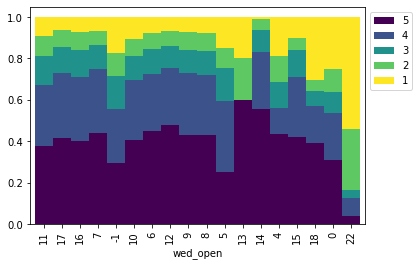

In [0]:
stars=[5,4,3,2,1]
(rest_df
 .pipe(lambda df_: pd.crosstab(df_.wed_open, df_.stars))
 .pipe(lambda df_: df_.div(df_.sum(axis=1), axis=0))
 .assign(reviewbin = lambda df_: pd.cut(rest_df.pipe(lambda df_: pd.crosstab(df_.wed_open, df_.stars)).sum(axis=1), bins=50, labels=[x for x in range(1, 51)]))
 .sort_values(by=['reviewbin', 5], ascending = False)
 .loc[:,[1,2,3,4,5]]
 .loc[:, stars]
 .plot.bar(stacked=True, width =1, cmap = 'viridis')
 .legend(bbox_to_anchor=(1,1))
 )



---

**2. Close**

---



In [0]:
(rest_df
 .pipe(lambda df_: pd.crosstab(df_.wed_close, df_.stars))
 .assign(sum = lambda df_: df_.sum(axis=1))
 .sort_values(by=['sum'], ascending = False)
 #.loc[:,[1,2,3,4,5]]
 .head()
 )

stars,1,2,3,4,5,sum
wed_close,,,,,,
22,1502,1725,2433,5661,7577,18898
21,682,772,1097,2413,3108,8072
-1,851,544,778,1280,1436,4889
23,425,471,633,1257,1614,4400
2,392,392,547,1219,1233,3783


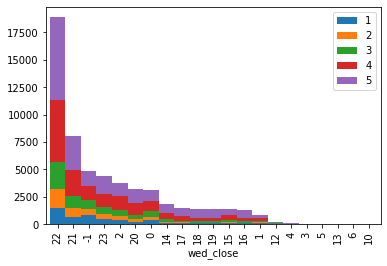

In [0]:
(rest_df
 .pipe(lambda df_: pd.crosstab(df_.wed_close, df_.stars))
 .assign(sum = lambda df_: df_.sum(axis=1))
 .sort_values(by=['sum'], ascending = False)
 .loc[:,[1,2,3,4,5]]
 .plot.bar(stacked=True, width =1)
 .legend(bbox_to_anchor=(1,1)))

In [0]:
(rest_df
 .pipe(lambda df_: pd.crosstab(df_.wed_close, df_.stars))
 .pipe(lambda df_: df_.div(df_.sum(axis=1), axis=0))
 .assign(reviewbin = lambda df_: pd.cut(rest_df.pipe(lambda df_: pd.crosstab(df_.wed_close, df_.stars)).sum(axis=1), bins=50, labels=[x for x in range(1, 51)]))
 .sort_values(by=['reviewbin', 5], ascending = False)
 #.loc[:,[1,2,3,4,5]]
 .head()
)

stars,1,2,3,4,5,reviewbin
wed_close,,,,,,
22,0.079479,0.091280,0.128744,0.299556,0.400942,50
21,0.084490,0.095639,0.135902,0.298935,0.385035,22
-1,0.174064,0.111270,0.159133,0.261812,0.293721,13
23,0.096591,0.107045,0.143864,0.285682,0.366818,12
2,0.103621,0.103621,0.144594,0.322231,0.325932,10


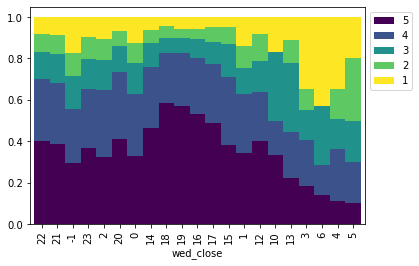

In [0]:
stars=[5,4,3,2,1]
(rest_df
 .pipe(lambda df_: pd.crosstab(df_.wed_close, df_.stars))
 .pipe(lambda df_: df_.div(df_.sum(axis=1), axis=0))
 .assign(reviewbin = lambda df_: pd.cut(rest_df.pipe(lambda df_: pd.crosstab(df_.wed_close, df_.stars)).sum(axis=1), bins=50, labels=[x for x in range(1, 51)]))
 .sort_values(by=['reviewbin', 5], ascending = False)
 .loc[:,[1,2,3,4,5]]
 .loc[:, stars]
 .plot.bar(stacked=True, width =1, cmap = 'viridis')
 .legend(bbox_to_anchor=(1,1))
 )

### Restaurants, Thursday Open/Close vs Stars







---
**1. Open**


---



In [0]:
(rest_df
 .pipe(lambda df_: pd.crosstab(df_.thu_open, df_.stars))
 .assign(sum = lambda df_: df_.sum(axis=1))
 .sort_values(by=['sum'], ascending = False)
 #.loc[:,[1,2,3,4,5]]
 .head()
 )

stars,1,2,3,4,5,sum
thu_open,,,,,,
11,2028,2230,3118,6518,8308,22202
17,404,532,824,2097,2763,6620
-1,858,546,768,1291,1585,5048
16,347,442,665,1551,2027,5032
7,312,346,572,1505,2063,4798


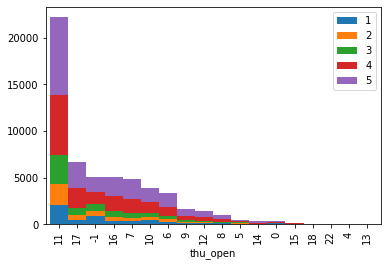

In [0]:
(rest_df
 .pipe(lambda df_: pd.crosstab(df_.thu_open, df_.stars))
 .assign(sum = lambda df_: df_.sum(axis=1))
 .sort_values(by=['sum'], ascending = False)
 .loc[:,[1,2,3,4,5]]
 .plot.bar(stacked=True, width =1)
 .legend(bbox_to_anchor=(1,1)))

In [0]:
(rest_df
 .pipe(lambda df_: pd.crosstab(df_.thu_open, df_.stars))
 .pipe(lambda df_: df_.div(df_.sum(axis=1), axis=0))
 .assign(reviewbin = lambda df_: pd.cut(rest_df.pipe(lambda df_: pd.crosstab(df_.thu_open, df_.stars)).sum(axis=1), bins=50, labels=[x for x in range(1, 51)]))
 .sort_values(by=['reviewbin', 5], ascending = False)
 #.loc[:,[1,2,3,4,5]]
 .head()
)

stars,1,2,3,4,5,reviewbin
thu_open,,,,,,
11,0.091343,0.100441,0.140438,0.293577,0.374201,50
17,0.061027,0.080363,0.124471,0.316767,0.417372,15
16,0.068959,0.087838,0.132154,0.308227,0.402822,12
-1,0.169968,0.108162,0.152139,0.255745,0.313986,12
7,0.065027,0.072113,0.119216,0.313672,0.429971,11


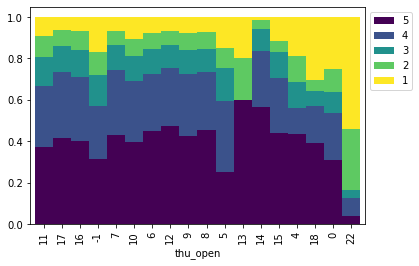

In [0]:
stars=[5,4,3,2,1]
(rest_df
 .pipe(lambda df_: pd.crosstab(df_.thu_open, df_.stars))
 .pipe(lambda df_: df_.div(df_.sum(axis=1), axis=0))
 .assign(reviewbin = lambda df_: pd.cut(rest_df.pipe(lambda df_: pd.crosstab(df_.thu_open, df_.stars)).sum(axis=1), bins=50, labels=[x for x in range(1, 51)]))
 .sort_values(by=['reviewbin', 5], ascending = False)
 .loc[:,[1,2,3,4,5]]
 .loc[:, stars]
 .plot.bar(stacked=True, width =1, cmap = 'viridis')
 .legend(bbox_to_anchor=(1,1))
 )



---

**2. Close**

---



In [0]:
(rest_df
 .pipe(lambda df_: pd.crosstab(df_.thu_close, df_.stars))
 .assign(sum = lambda df_: df_.sum(axis=1))
 .sort_values(by=['sum'], ascending = False)
 #.loc[:,[1,2,3,4,5]]
 .head()
 )

stars,1,2,3,4,5,sum
thu_close,,,,,,
22,1410,1648,2314,5457,7273,18102
21,670,745,1072,2384,3093,7964
-1,858,546,768,1291,1585,5048
23,469,512,698,1356,1609,4644
2,415,418,587,1300,1327,4047


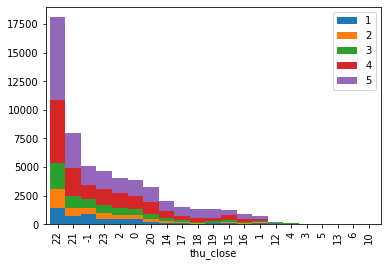

In [0]:
(rest_df
 .pipe(lambda df_: pd.crosstab(df_.thu_close, df_.stars))
 .assign(sum = lambda df_: df_.sum(axis=1))
 .sort_values(by=['sum'], ascending = False)
 .loc[:,[1,2,3,4,5]]
 .plot.bar(stacked=True, width =1)
 .legend(bbox_to_anchor=(1,1)))

In [0]:
(rest_df
 .pipe(lambda df_: pd.crosstab(df_.thu_close, df_.stars))
 .pipe(lambda df_: df_.div(df_.sum(axis=1), axis=0))
 .assign(reviewbin = lambda df_: pd.cut(rest_df.pipe(lambda df_: pd.crosstab(df_.thu_close, df_.stars)).sum(axis=1), bins=50, labels=[x for x in range(1, 51)]))
 .sort_values(by=['reviewbin', 5], ascending = False)
 #.loc[:,[1,2,3,4,5]]
 .head()
)

stars,1,2,3,4,5,reviewbin
thu_close,,,,,,
22,0.077892,0.091040,0.127831,0.301458,0.401779,50
21,0.084129,0.093546,0.134606,0.299347,0.388373,22
-1,0.169968,0.108162,0.152139,0.255745,0.313986,14
23,0.100991,0.110250,0.150301,0.291990,0.346469,13
2,0.102545,0.103286,0.145046,0.321226,0.327897,12


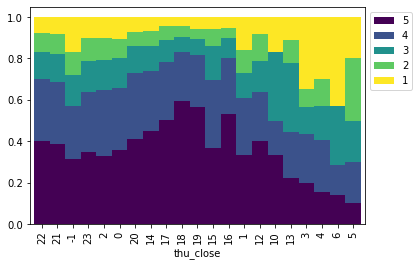

In [0]:
stars=[5,4,3,2,1]
(rest_df
 .pipe(lambda df_: pd.crosstab(df_.thu_close, df_.stars))
 .pipe(lambda df_: df_.div(df_.sum(axis=1), axis=0))
 .assign(reviewbin = lambda df_: pd.cut(rest_df.pipe(lambda df_: pd.crosstab(df_.thu_close, df_.stars)).sum(axis=1), bins=50, labels=[x for x in range(1, 51)]))
 .sort_values(by=['reviewbin', 5], ascending = False)
 .loc[:,[1,2,3,4,5]]
 .loc[:, stars]
 .plot.bar(stacked=True, width =1, cmap = 'viridis')
 .legend(bbox_to_anchor=(1,1))
 )

### Restaurants, Friday Open/Close vs Stars



---

**1. Open**

---



In [0]:
(rest_df
 .pipe(lambda df_: pd.crosstab(df_.fri_open, df_.stars))
 .assign(sum = lambda df_: df_.sum(axis=1))
 .sort_values(by=['sum'], ascending = False)
 #.loc[:,[1,2,3,4,5]]
 .head()
 )

stars,1,2,3,4,5,sum
fri_open,,,,,,
11,2182,2384,3376,7129,9006,24077
17,389,531,833,2116,2776,6645
7,327,356,582,1556,2202,5023
-1,831,517,741,1194,1365,4648
10,411,328,455,1114,1523,3831


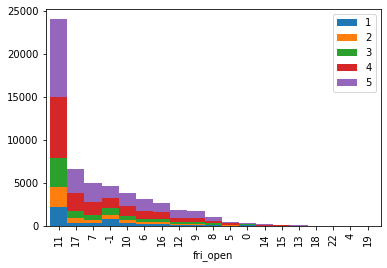

In [0]:
(rest_df
 .pipe(lambda df_: pd.crosstab(df_.fri_open, df_.stars))
 .assign(sum = lambda df_: df_.sum(axis=1))
 .sort_values(by=['sum'], ascending = False)
 .loc[:,[1,2,3,4,5]]
 .plot.bar(stacked=True, width =1)
 .legend(bbox_to_anchor=(1,1)))

In [0]:
(rest_df
 .pipe(lambda df_: pd.crosstab(df_.fri_open, df_.stars))
 .pipe(lambda df_: df_.div(df_.sum(axis=1), axis=0))
 .assign(reviewbin = lambda df_: pd.cut(rest_df.pipe(lambda df_: pd.crosstab(df_.fri_open, df_.stars)).sum(axis=1), bins=50, labels=[x for x in range(1, 51)]))
 .sort_values(by=['reviewbin', 5], ascending = False)
 #.loc[:,[1,2,3,4,5]]
 .head()
)

stars,1,2,3,4,5,reviewbin
fri_open,,,,,,
11,0.090626,0.099016,0.140217,0.296092,0.374050,50
17,0.058540,0.079910,0.125357,0.318435,0.417758,14
7,0.065101,0.070874,0.115867,0.309775,0.438383,11
-1,0.178787,0.111231,0.159423,0.256885,0.293675,10
10,0.107283,0.085617,0.118768,0.290786,0.397546,8


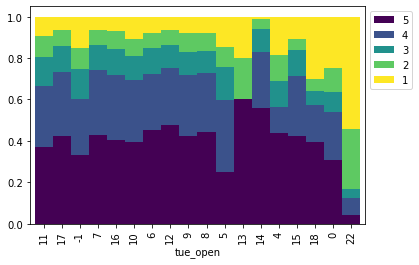

In [0]:
stars=[5,4,3,2,1]
(rest_df
 .pipe(lambda df_: pd.crosstab(df_.tue_open, df_.stars))
 .pipe(lambda df_: df_.div(df_.sum(axis=1), axis=0))
 .assign(reviewbin = lambda df_: pd.cut(rest_df.pipe(lambda df_: pd.crosstab(df_.tue_open, df_.stars)).sum(axis=1), bins=50, labels=[x for x in range(1, 51)]))
 .sort_values(by=['reviewbin', 5], ascending = False)
 .loc[:,[1,2,3,4,5]]
 .loc[:, stars]
 .plot.bar(stacked=True, width =1, cmap = 'viridis')
 .legend(bbox_to_anchor=(1,1))
 )



---
**2. Close**

---



In [0]:
(rest_df
 .pipe(lambda df_: pd.crosstab(df_.fri_close, df_.stars))
 .assign(sum = lambda df_: df_.sum(axis=1))
 .sort_values(by=['sum'], ascending = False)
 #.loc[:,[1,2,3,4,5]]
 .head()
 )

stars,1,2,3,4,5,sum
fri_close,,,,,,
23,937,1178,1629,3927,5377,13048
22,892,988,1401,2968,3515,9764
0,530,560,809,1730,2235,5864
2,618,557,776,1644,1709,5304
-1,831,517,741,1194,1365,4648


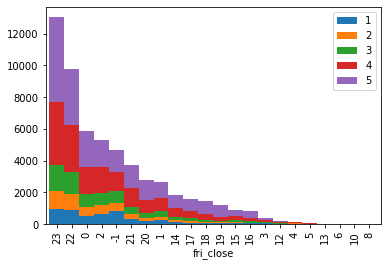

In [0]:
(rest_df
 .pipe(lambda df_: pd.crosstab(df_.fri_close, df_.stars))
 .assign(sum = lambda df_: df_.sum(axis=1))
 .sort_values(by=['sum'], ascending = False)
 .loc[:,[1,2,3,4,5]]
 .plot.bar(stacked=True, width =1)
 .legend(bbox_to_anchor=(1,1)))

In [0]:
(rest_df
 .pipe(lambda df_: pd.crosstab(df_.fri_close, df_.stars))
 .pipe(lambda df_: df_.div(df_.sum(axis=1), axis=0))
 .assign(reviewbin = lambda df_: pd.cut(rest_df.pipe(lambda df_: pd.crosstab(df_.fri_close, df_.stars)).sum(axis=1), bins=50, labels=[x for x in range(1, 51)]))
 .sort_values(by=['reviewbin', 5], ascending = False)
 #.loc[:,[1,2,3,4,5]]
 .head()
)

stars,1,2,3,4,5,reviewbin
fri_close,,,,,,
23,0.071812,0.090282,0.124847,0.300966,0.412094,50
22,0.091356,0.101188,0.143486,0.303974,0.359996,38
0,0.090382,0.095498,0.137960,0.295020,0.381139,23
2,0.116516,0.105015,0.146305,0.309955,0.322210,21
-1,0.178787,0.111231,0.159423,0.256885,0.293675,18


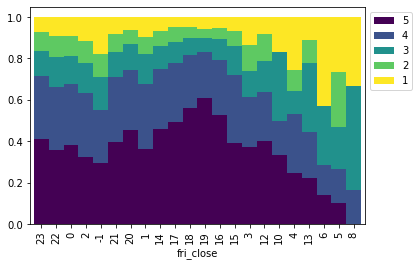

In [0]:
stars=[5,4,3,2,1]
(rest_df
 .pipe(lambda df_: pd.crosstab(df_.fri_close, df_.stars))
 .pipe(lambda df_: df_.div(df_.sum(axis=1), axis=0))
 .assign(reviewbin = lambda df_: pd.cut(rest_df.pipe(lambda df_: pd.crosstab(df_.fri_close, df_.stars)).sum(axis=1), bins=50, labels=[x for x in range(1, 51)]))
 .sort_values(by=['reviewbin', 5], ascending = False)
 .loc[:,[1,2,3,4,5]]
 .loc[:, stars]
 .plot.bar(stacked=True, width =1, cmap = 'viridis')
 .legend(bbox_to_anchor=(1,1))
 )

### Restaurants, Saturday Open/Close vs Stars



---


**1. Open**

---



In [0]:
(rest_df
 .pipe(lambda df_: pd.crosstab(df_.sat_open, df_.stars))
 .assign(sum = lambda df_: df_.sum(axis=1))
 .sort_values(by=['sum'], ascending = False)
 #.loc[:,[1,2,3,4,5]]
 .head()
 )

stars,1,2,3,4,5,sum
sat_open,,,,,,
11,1495,1559,2256,4912,6276,16498
17,499,675,1011,2325,3089,7599
-1,891,583,853,1486,1782,5595
12,376,441,641,1476,2083,5017
10,460,378,529,1287,1717,4371


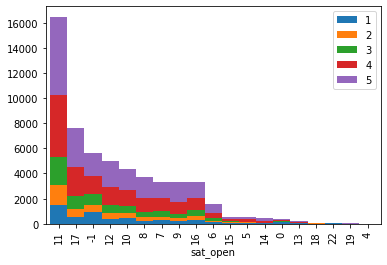

In [0]:
(rest_df
 .pipe(lambda df_: pd.crosstab(df_.sat_open, df_.stars))
 .assign(sum = lambda df_: df_.sum(axis=1))
 .sort_values(by=['sum'], ascending = False)
 .loc[:,[1,2,3,4,5]]
 .plot.bar(stacked=True, width =1)
 .legend(bbox_to_anchor=(1,1)))

In [0]:
(rest_df
 .pipe(lambda df_: pd.crosstab(df_.sat_open, df_.stars))
 .pipe(lambda df_: df_.div(df_.sum(axis=1), axis=0))
 .assign(reviewbin = lambda df_: pd.cut(rest_df.pipe(lambda df_: pd.crosstab(df_.sat_open, df_.stars)).sum(axis=1), bins=50, labels=[x for x in range(1, 51)]))
 .sort_values(by=['reviewbin', 5], ascending = False)
 #.loc[:,[1,2,3,4,5]]
 .head()
)

stars,1,2,3,4,5,reviewbin
sat_open,,,,,,
11,0.090617,0.094496,0.136744,0.297733,0.380410,50
17,0.065667,0.088827,0.133044,0.305961,0.406501,24
-1,0.159249,0.104200,0.152458,0.265594,0.318499,17
12,0.074945,0.087901,0.127766,0.294200,0.415188,16
10,0.105239,0.086479,0.121025,0.294441,0.392816,14


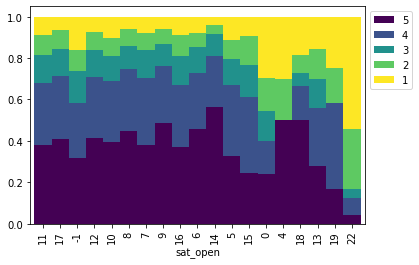

In [0]:
stars=[5,4,3,2,1]
(rest_df
 .pipe(lambda df_: pd.crosstab(df_.sat_open, df_.stars))
 .pipe(lambda df_: df_.div(df_.sum(axis=1), axis=0))
 .assign(reviewbin = lambda df_: pd.cut(rest_df.pipe(lambda df_: pd.crosstab(df_.sat_open, df_.stars)).sum(axis=1), bins=50, labels=[x for x in range(1, 51)]))
 .sort_values(by=['reviewbin', 5], ascending = False)
 .loc[:,[1,2,3,4,5]]
 .loc[:, stars]
 .plot.bar(stacked=True, width =1, cmap = 'viridis')
 .legend(bbox_to_anchor=(1,1))
 )



---

**2. Close**

---



In [0]:
(rest_df
 .pipe(lambda df_: pd.crosstab(df_.sat_close, df_.stars))
 .assign(sum = lambda df_: df_.sum(axis=1))
 .sort_values(by=['sum'], ascending = False)
 #.loc[:,[1,2,3,4,5]]
 .head()
 )

stars,1,2,3,4,5,sum
sat_close,,,,,,
23,962,1221,1615,3896,5239,12933
22,855,909,1344,2806,3219,9133
0,559,599,850,1804,2285,6097
-1,891,583,853,1486,1782,5595
2,618,557,776,1644,1709,5304


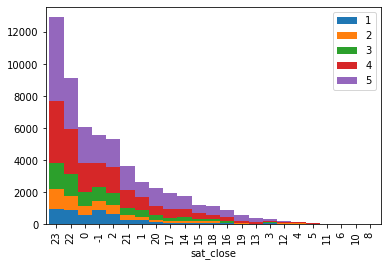

In [0]:
(rest_df
 .pipe(lambda df_: pd.crosstab(df_.sat_close, df_.stars))
 .assign(sum = lambda df_: df_.sum(axis=1))
 .sort_values(by=['sum'], ascending = False)
 .loc[:,[1,2,3,4,5]]
 .plot.bar(stacked=True, width =1)
 .legend(bbox_to_anchor=(1,1)))

In [0]:
(rest_df
 .pipe(lambda df_: pd.crosstab(df_.sat_close, df_.stars))
 .pipe(lambda df_: df_.div(df_.sum(axis=1), axis=0))
 .assign(reviewbin = lambda df_: pd.cut(rest_df.pipe(lambda df_: pd.crosstab(df_.sat_close, df_.stars)).sum(axis=1), bins=50, labels=[x for x in range(1, 51)]))
 .sort_values(by=['reviewbin', 5], ascending = False)
 #.loc[:,[1,2,3,4,5]]
 .head()
)

stars,1,2,3,4,5,reviewbin
sat_close,,,,,,
23,0.074383,0.094410,0.124874,0.301245,0.405088,50
22,0.093617,0.099529,0.147159,0.307237,0.352458,36
0,0.091684,0.098245,0.139413,0.295883,0.374774,24
-1,0.159249,0.104200,0.152458,0.265594,0.318499,22
2,0.116516,0.105015,0.146305,0.309955,0.322210,21


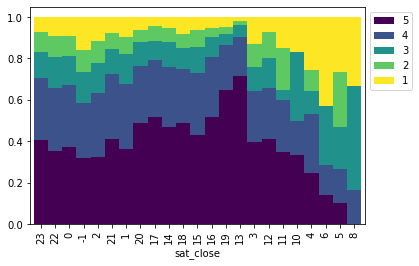

In [0]:
stars=[5,4,3,2,1]
(rest_df
 .pipe(lambda df_: pd.crosstab(df_.sat_close, df_.stars))
 .pipe(lambda df_: df_.div(df_.sum(axis=1), axis=0))
 .assign(reviewbin = lambda df_: pd.cut(rest_df.pipe(lambda df_: pd.crosstab(df_.sat_close, df_.stars)).sum(axis=1), bins=50, labels=[x for x in range(1, 51)]))
 .sort_values(by=['reviewbin', 5], ascending = False)
 .loc[:,[1,2,3,4,5]]
 .loc[:, stars]
 .plot.bar(stacked=True, width =1, cmap = 'viridis')
 .legend(bbox_to_anchor=(1,1))
 )

### Restaurants, Sunday Open/Close vs Stars



---

**1. Open**

---



In [0]:
(rest_df
 .pipe(lambda df_: pd.crosstab(df_.sun_open, df_.stars))
 .assign(sum = lambda df_: df_.sum(axis=1))
 .sort_values(by=['sum'], ascending = False)
 #.loc[:,[1,2,3,4,5]]
 .head()
 )

stars,1,2,3,4,5,sum
sun_open,,,,,,
-1,1382,1164,1800,4004,5752,14102
11,1318,1323,1811,3572,4387,12411
12,422,384,596,1443,2045,4890
10,491,503,671,1446,1687,4798
16,320,393,569,1286,1616,4184


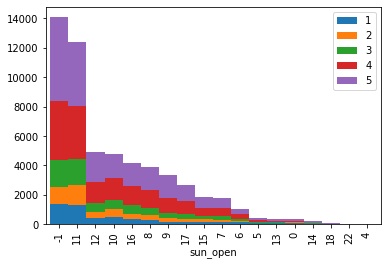

In [0]:
(rest_df
 .pipe(lambda df_: pd.crosstab(df_.sun_open, df_.stars))
 .assign(sum = lambda df_: df_.sum(axis=1))
 .sort_values(by=['sum'], ascending = False)
 .loc[:,[1,2,3,4,5]]
 .plot.bar(stacked=True, width =1)
 .legend(bbox_to_anchor=(1,1)))

In [0]:
(rest_df
 .pipe(lambda df_: pd.crosstab(df_.sun_open, df_.stars))
 .pipe(lambda df_: df_.div(df_.sum(axis=1), axis=0))
 .assign(reviewbin = lambda df_: pd.cut(rest_df.pipe(lambda df_: pd.crosstab(df_.sun_open, df_.stars)).sum(axis=1), bins=50, labels=[x for x in range(1, 51)]))
 .sort_values(by=['reviewbin', 5], ascending = False)
 #.loc[:,[1,2,3,4,5]]
 .head()
)

stars,1,2,3,4,5,reviewbin
sun_open,,,,,,
-1,0.098000,0.082541,0.127641,0.283931,0.407885,50
11,0.106196,0.106599,0.145919,0.287809,0.353477,45
12,0.086299,0.078528,0.121881,0.295092,0.418200,18
10,0.102334,0.104835,0.139850,0.301376,0.351605,17
16,0.076482,0.093929,0.135994,0.307361,0.386233,15


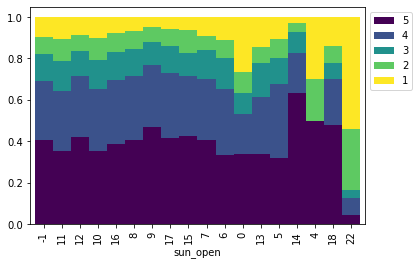

In [0]:
stars=[5,4,3,2,1]
(rest_df
 .pipe(lambda df_: pd.crosstab(df_.sun_open, df_.stars))
 .pipe(lambda df_: df_.div(df_.sum(axis=1), axis=0))
 .assign(reviewbin = lambda df_: pd.cut(rest_df.pipe(lambda df_: pd.crosstab(df_.sun_open, df_.stars)).sum(axis=1), bins=50, labels=[x for x in range(1, 51)]))
 .sort_values(by=['reviewbin', 5], ascending = False)
 .loc[:,[1,2,3,4,5]]
 .loc[:, stars]
 .plot.bar(stacked=True, width =1, cmap = 'viridis')
 .legend(bbox_to_anchor=(1,1))
 )



---

**2. Close**

---



In [0]:
(rest_df
 .pipe(lambda df_: pd.crosstab(df_.sun_close, df_.stars))
 .assign(sum = lambda df_: df_.sum(axis=1))
 .sort_values(by=['sum'], ascending = False)
 #.loc[:,[1,2,3,4,5]]
 .head()
 )

stars,1,2,3,4,5,sum
sun_close,,,,,,
-1,1382,1164,1800,4004,5752,14102
21,838,1050,1438,3100,3572,9998
22,746,789,1171,2715,3656,9077
20,328,367,513,1140,1614,3962
2,348,341,508,1099,1136,3432


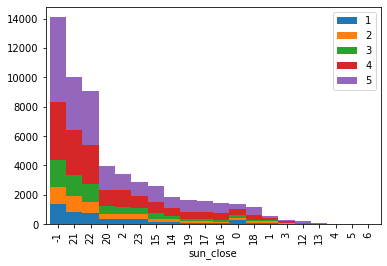

In [0]:
(rest_df
 .pipe(lambda df_: pd.crosstab(df_.sun_close, df_.stars))
 .assign(sum = lambda df_: df_.sum(axis=1))
 .sort_values(by=['sum'], ascending = False)
 .loc[:,[1,2,3,4,5]]
 .plot.bar(stacked=True, width =1)
 .legend(bbox_to_anchor=(1,1)))

In [0]:
(rest_df
 .pipe(lambda df_: pd.crosstab(df_.sun_close, df_.stars))
 .pipe(lambda df_: df_.div(df_.sum(axis=1), axis=0))
 .assign(reviewbin = lambda df_: pd.cut(rest_df.pipe(lambda df_: pd.crosstab(df_.sun_close, df_.stars)).sum(axis=1), bins=50, labels=[x for x in range(1, 51)]))
 .sort_values(by=['reviewbin', 5], ascending = False)
 #.loc[:,[1,2,3,4,5]]
 .head()
)

stars,1,2,3,4,5,reviewbin
sun_close,,,,,,
-1,0.098000,0.082541,0.127641,0.283931,0.407885,50
21,0.083817,0.105021,0.143829,0.310062,0.357271,36
22,0.082186,0.086923,0.129007,0.299108,0.402776,33
20,0.082786,0.092630,0.129480,0.287733,0.407370,15
2,0.101399,0.099359,0.148019,0.320221,0.331002,13


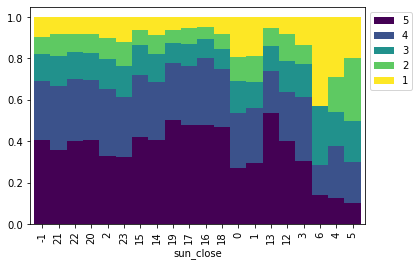

In [0]:
stars=[5,4,3,2,1]
(rest_df
 .pipe(lambda df_: pd.crosstab(df_.sun_close, df_.stars))
 .pipe(lambda df_: df_.div(df_.sum(axis=1), axis=0))
 .assign(reviewbin = lambda df_: pd.cut(rest_df.pipe(lambda df_: pd.crosstab(df_.sun_close, df_.stars)).sum(axis=1), bins=50, labels=[x for x in range(1, 51)]))
 .sort_values(by=['reviewbin', 5], ascending = False)
 .loc[:,[1,2,3,4,5]]
 .loc[:, stars]
 .plot.bar(stacked=True, width =1, cmap = 'viridis')
 .legend(bbox_to_anchor=(1,1))
 )

### Company Review vs Company Star

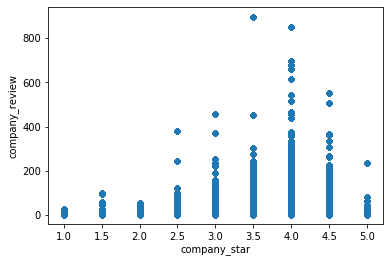

In [0]:
rdf.plot.scatter(x = 'company_star', y = 'company_review')

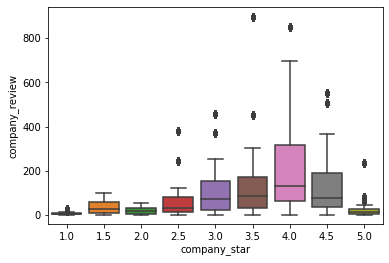

In [0]:
sns.boxplot(x='company_star', y='company_review', data=rdf)

### Review vs Stars

In [0]:
pd.pivot_table(rdf, values='stars', index = 'review', aggfunc = 'mean')

,stars
review,
negative,3.216967
neutral,3.922956
positive,4.117545


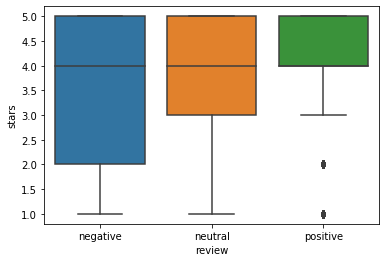

In [0]:
sns.boxplot(x = 'review', y = 'stars', data = rdf)

In [0]:
rdf.pipe(lambda df_: pd.crosstab(df_.review, df_.stars))

stars,1,2,3,4,5
review,,,,,
negative,6202,4190,4597,6960,8074
neutral,1906,1646,2640,6133,9935
positive,1499,2052,4204,11414,17064


In [0]:
rdf.review.value_counts()

positive    36233
negative    30023
neutral     22260
Name: review, dtype: int64

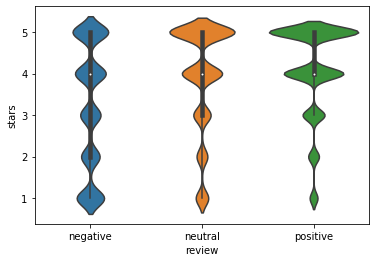

In [0]:
sns.violinplot(x='review', y='stars', data=rdf)

### Stars vs Company Stars

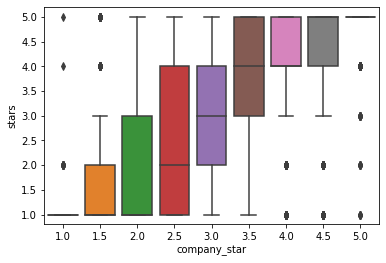

In [0]:
sns.boxplot(x='company_star', y='stars', data = rdf)

In [0]:
rdf.company_star.corr(rdf.stars)

0.4878587770230583

### Company Reviews vs Stars

In [0]:
rdf.company_review.corr(rdf.stars)

0.06775718872128503

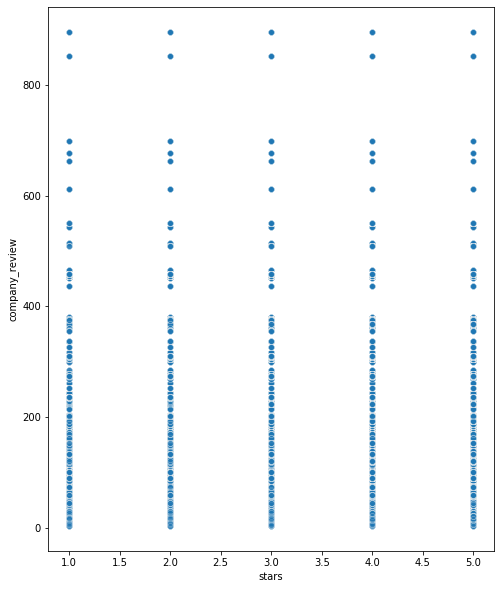

In [0]:
ax, fig = plt.subplots(figsize=(8,10))
sns.scatterplot(x='stars', y='company_review', data=rdf, alpha = .2)

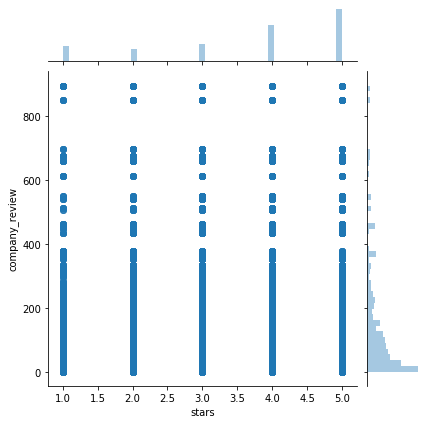

In [0]:
sns.jointplot(x='stars', y='company_review', data=rdf, alpha = .2)

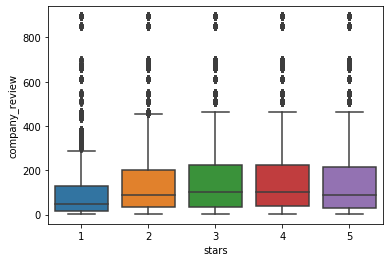

In [0]:
sns.boxplot(x='stars', y='company_review', data=rdf)

### Parking vs Stars



---

**1. Garage**

---



In [0]:
(rdf
 .pipe(lambda df_: pd.crosstab(df_.park_garage, df_.stars))
 )

stars,1,2,3,4,5
park_garage,,,,,
-1,2316,971,1315,2436,4780
0,6226,5977,8848,20038,27742
1,1065,940,1278,2033,2551


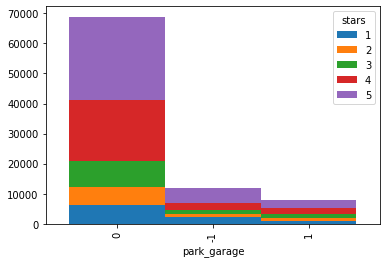

In [0]:
park =[0, -1, 1]
(rdf
 .pipe(lambda df_: pd.crosstab(df_.park_garage, df_.stars))
 .loc[park]
 .plot.bar(stacked=True, width=1)
 )

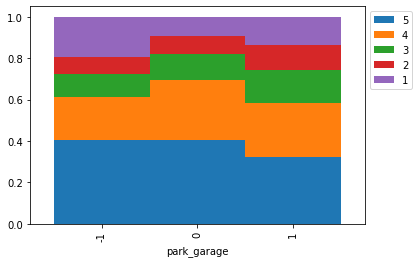

In [0]:
park =[-1, 0, 1]
stars=[5,4,3,2,1]
(rdf
 .pipe(lambda df_: pd.crosstab(df_.park_garage, df_.stars))
 .pipe(lambda df_: df_.div(df_.sum(axis=1), axis=0))
 .loc[park, stars]
 .plot.bar(stacked=True, width=1)
 .legend(bbox_to_anchor=(1,1))
 )



---

**2. Street**

---



In [0]:
(rdf
 .pipe(lambda df_: pd.crosstab(df_.park_street, df_.stars))
 )

stars,1,2,3,4,5
park_street,,,,,
-1,2316,971,1315,2436,4780
0,3855,3066,4239,8439,11853
1,3436,3851,5887,13632,18440


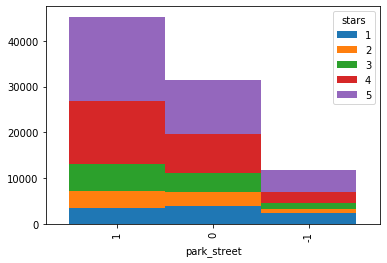

In [0]:
park =[1, 0, -1]
(rdf
 .pipe(lambda df_: pd.crosstab(df_.park_street, df_.stars))
 .loc[park]
 .plot.bar(stacked=True, width=1)
 )

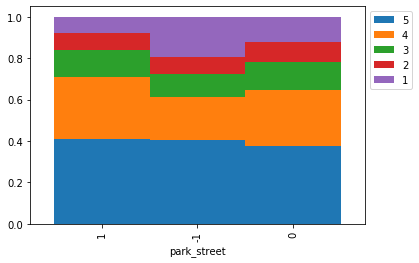

In [0]:
park =[1, -1, 0]
stars=[5,4,3,2,1]
(rdf
 .pipe(lambda df_: pd.crosstab(df_.park_street, df_.stars))
 .pipe(lambda df_: df_.div(df_.sum(axis=1), axis=0))
 .loc[park, stars]
 .plot.bar(stacked=True, width=1)
 .legend(bbox_to_anchor=(1,1))
 )



---

**3. Lot**

---



In [0]:
(rdf
 .pipe(lambda df_: pd.crosstab(df_.park_lot, df_.stars))
 )

stars,1,2,3,4,5
park_lot,,,,,
-1,2316,971,1315,2436,4780
0,5070,4991,7149,15077,20769
1,2221,1926,2977,6994,9524


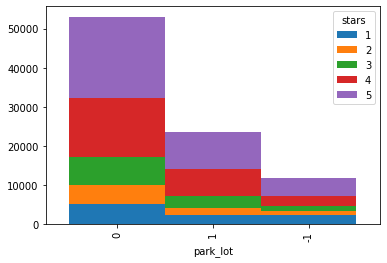

In [0]:
park =[ 0, 1, -1]
(rdf
 .pipe(lambda df_: pd.crosstab(df_.park_lot, df_.stars))
 .loc[park]
 .plot.bar(stacked=True, width=1)
 )

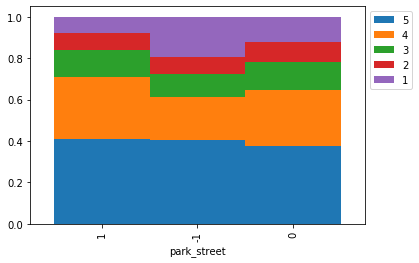

In [0]:
park =[1, -1, 0]
stars=[5,4,3,2,1]
(rdf
 .pipe(lambda df_: pd.crosstab(df_.park_street, df_.stars))
 .pipe(lambda df_: df_.div(df_.sum(axis=1), axis=0))
 .loc[park, stars]
 .plot.bar(stacked=True, width=1)
 .legend(bbox_to_anchor=(1,1))
 )



---

**4. Valid**

---



In [0]:
(rdf
 .pipe(lambda df_: pd.crosstab(df_.park_valid, df_.stars))
 )

stars,1,2,3,4,5
park_valid,,,,,
-1,2316,971,1315,2436,4780
0,7132,6776,9979,21830,29985
1,159,141,147,241,308


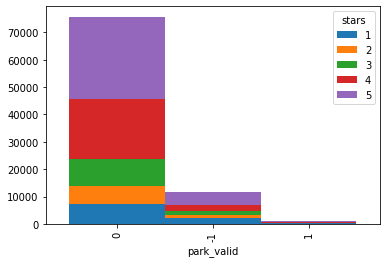

In [0]:
park =[ 0, -1, 1]
(rdf
 .pipe(lambda df_: pd.crosstab(df_.park_valid, df_.stars))
 .loc[park]
 .plot.bar(stacked=True, width=1)
 )

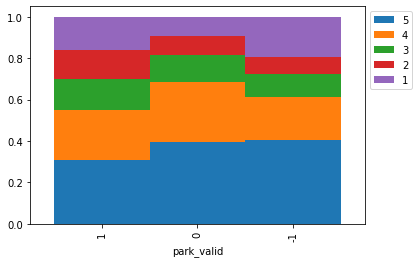

In [0]:
park =[1, 0, -1]
stars=[5,4,3,2,1]
(rdf
 .pipe(lambda df_: pd.crosstab(df_.park_valid, df_.stars))
 .pipe(lambda df_: df_.div(df_.sum(axis=1), axis=0))
 .loc[park, stars]
 .plot.bar(stacked=True, width=1)
 .legend(bbox_to_anchor=(1,1))
 )



---

**5. Vallet**

---



In [0]:
(rdf
 .pipe(lambda df_: pd.crosstab(df_.park_vallet, df_.stars))
 )

stars,1,2,3,4,5
park_vallet,,,,,
-1,2316,971,1315,2436,4780
0,6110,5642,8416,19044,26610
1,1181,1275,1710,3027,3683


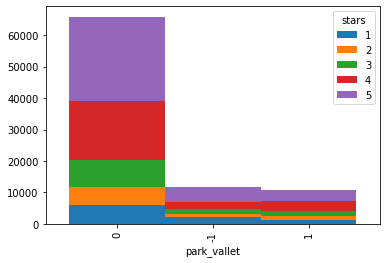

In [0]:
park =[ 0, -1, 1]
(rdf
 .pipe(lambda df_: pd.crosstab(df_.park_vallet, df_.stars))
 .loc[park]
 .plot.bar(stacked=True, width=1)
 )

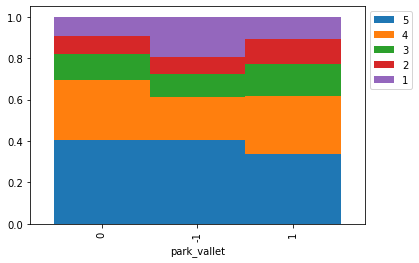

In [0]:
park =[0, -1, 1]
stars=[5,4,3,2,1]
(rdf
 .pipe(lambda df_: pd.crosstab(df_.park_vallet, df_.stars))
 .pipe(lambda df_: df_.div(df_.sum(axis=1), axis=0))
 .loc[park, stars]
 .plot.bar(stacked=True, width=1)
 .legend(bbox_to_anchor=(1,1))
 )



---

**6. Bike**

---



In [0]:
(rdf
 .pipe(lambda df_: pd.crosstab(df_.park_bike, df_.stars))
 )

stars,1,2,3,4,5
park_bike,,,,,
-1,2833,1454,1961,3567,6092
0,1293,888,1150,2341,3241
1,5481,5546,8330,18599,25740


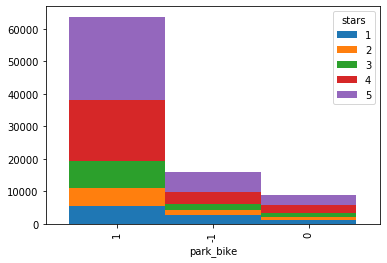

In [0]:
park =[ 1, -1, 0]
(rdf
 .pipe(lambda df_: pd.crosstab(df_.park_bike, df_.stars))
 .loc[park]
 .plot.bar(stacked=True, width=1)
 )

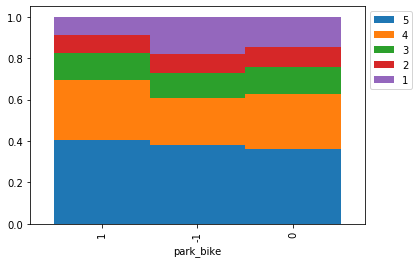

In [0]:
park =[1, -1, 0]
stars=[5,4,3,2,1]
(rdf
 .pipe(lambda df_: pd.crosstab(df_.park_bike, df_.stars))
 .pipe(lambda df_: df_.div(df_.sum(axis=1), axis=0))
 .loc[park, stars]
 .plot.bar(stacked=True, width=1)
 .legend(bbox_to_anchor=(1,1))
 )